<h1 style="font-family: Trebuchet MS; padding: 30px; font-size: 33px; color:  #2D2926; text-align: center; line-height: 0.95;background-color: #57C5B6"><b>HR ANALYTICS : TURNOVER OF DATA SCIENTIST IN A COMPANY</b></h1>

# INTRODUCTION

LeadOne Company is actively involved in the dynamic fields of Big Data and Data Science. The organization is currently in search of Data Scientist candidates open to complimentary training opportunities. Based on data collected by the HR department, a challenge arises as some candidates who successfully complete the training choose to leave and look for another job, potentially leading to financial losses for the organization. 

To address this challenge, LeadOne Company has enlisted STIGMA's assistance in identifying candidates likely to leave post-training and understanding the characteristics associated with this decision so they can mitigate the issue promptly and provide  solution preventing candidate to leave and potentially reducing wasted costs. 

manual identification of such characteristics by HR would be a time-consuming process. Implementing a machine learning model not only provides a more efficient and time-effective solution but also promises to optimize resources and minimize financial losses associated with candidate turnover. The implementation of predictive modelling is designed to categorize candidates efficiently and making a strategic planning for future training sessions. 

## BACKGROUND

The primary issue identified in this dataset related to the company's provision of complimentary training for Data Scientist candidates who commit to commencing employment with the organization after their training. However, of the 19,158 candidates who received this training, 4,777 (24.9%) did not persist in their employment with the company, resulting in the company incurring training costs and time losses.

## GOAL

Reduce Turnover Rate from 24.9% to at least 14,67% in order to Reduce Cost

## OBJECTIVE

Our objective is to develop a machine learning predictive model that can predict which candidate characteristics are likely to leave the company after training.

## BUSINESS METRICS

Turnover Rate (%)
and Training Cost Loss (USD).

# DATA PROCESSING

## STAGE 1 - EXPLORATORY DATA ANALYSIS
(please hide this markdown to view stage 2)


### Import and Load Data

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from scipy.stats import chi2_contingency
mpl.rcParams['font.family'] = 'sans-serif'
plt.style.use('ggplot')
sns.set()

# sklearn - preprocessing and modelling
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import CategoricalNB
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingClassifier
!pip install shap
import shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 7.7 MB/s eta 0:00:00


In [ ]:
# sns.set(rc={'figure.figsize':(20.7,8.27)})
# sns.set_style("whitegrid")
# sns.color_palette("dark")
# plt.style.use("fivethirtyeight")

In [ ]:
!gdown 1Ug89rLFlYNGvZHKLORzQmMnZsdSXvgUn

Downloading...
From: https://drive.google.com/uc?id=1Ug89rLFlYNGvZHKLORzQmMnZsdSXvgUn
To: /content/aug_train.csv
100% 1.96M/1.96M [00:00<00:00, 38.1MB/s]


In [ ]:
df = pd.read_csv('aug_train.csv')

### Describe Data

#### Data Type

In [ ]:
df.sample(5)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
13344,14411,city_21,0.624,Male,Has relevent experience,Full time course,Masters,STEM,1,50-99,Pvt Ltd,1,50,1.0
13130,29279,city_16,0.910,Male,Has relevent experience,no_enrollment,Graduate,STEM,5,50-99,Pvt Ltd,1,102,0.0
2368,18468,city_11,0.550,NaN,Has relevent experience,no_enrollment,Graduate,Business Degree,2,50-99,Pvt Ltd,1,66,1.0
17484,4758,city_57,0.866,NaN,No relevent experience,NaN,NaN,NaN,9,NaN,NaN,never,59,0.0
17877,8798,city_160,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,15,NaN,NaN,1,110,0.0


In [ ]:
df.shape

(19158, 14)

Dataset consist of 19158 rows, and 14 columns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

Here we do some grouping from the candidate attributes<br>

Personal :
* gender
* enrolled_university

Education :
* education level
* major discipline

Geo :
* city
* city_development_index

Related to job :
* relevant_experience
* company_size
* company_type
* last_new_job
* experience

we aren't going to use 'training_hours' column after EDA because, training hours is counted as data leakage

**Columns that the Data Type should be change for analysis purpose** :
- enrollee_id column, the datatype need to be change to object because the ID column is not countable

- rename columns 'last_new_job' to 'last_job_tenure', 'enrolled_university' to 'current_enrolled_status' and 'relevent_experience' to 'relevant_experience'

- there's 1 not normal value in company size column, where all the values majority look like this '10-99',  there's one value is '10/49'

- the other columns is fine... even though we see there's some column that the data type should be change to int, we planned to binning the value of the columns later.

- the target column name should be change to 'JobChange', and the data type should be (object) Not Looking for job change and Looking for job change, not 1.0 and 0.0 (float)

In [ ]:
dfs = df.copy()
dfs['enrollee_id'] = dfs['enrollee_id'].astype(str)
dfs.rename(columns={'last_new_job' : 'last_job_tenure',
                   'enrolled_university' : 'enrolled_status',
                   'relevent_experience' : 'relevant_experience'}, inplace=True)

dfs['company_size'].replace('10/49', '10-49', inplace=True)

dfs['target'] = dfs['target'].astype(int)
dfs['target'] = dfs['target'].astype(object)

In [ ]:
dfs.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevant_experience', 'enrolled_status', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_job_tenure', 'training_hours', 'target'],
      dtype='object')

column name looks more fine now

#### Missing Values

B. Apakah ada kolom yang memiliki nilai kosong? Jika ada, apa saja?

In [ ]:
dfs.isna().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevant_experience          0
enrolled_status            386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_job_tenure            423
training_hours               0
target                       0
dtype: int64

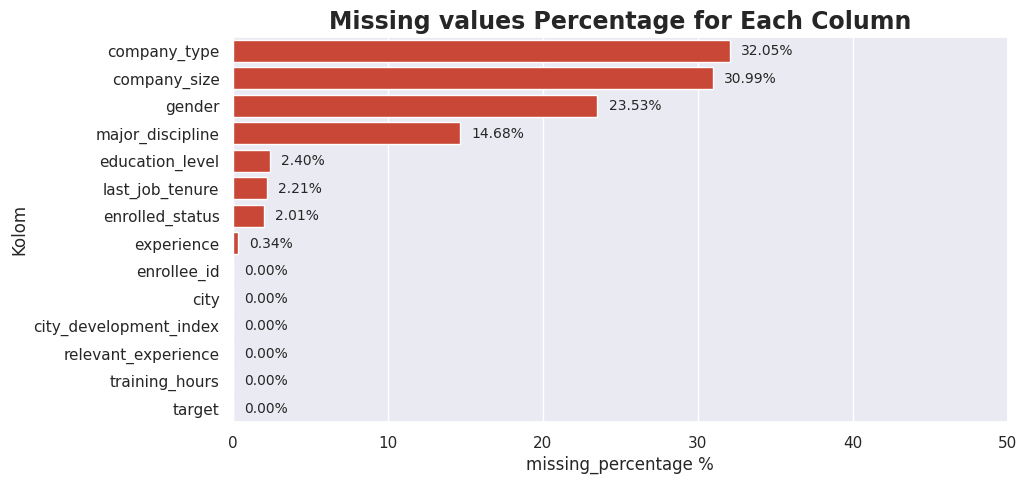

In [ ]:
missing = dfs.isnull().sum()*100 / len(dfs)

percentage_missing = pd.DataFrame({'column':dfs.columns,
                                   'missing_percentage %':missing.values})
percentage_missing['missing_percentage %'] = percentage_missing['missing_percentage %'].round(2)
percentage_missing = percentage_missing.sort_values('missing_percentage %', ascending=False)
percentage_missing = percentage_missing.reset_index()
percentage_missing = percentage_missing.drop('index', axis=1)

# plot the missing value percentage
plt.figure(figsize=(10,5))
ax = sns.barplot(x='missing_percentage %', y='column', data=percentage_missing, color='#E1341E')
for p in ax.patches:
    ax.annotate("%.2f" % p.get_width() + '%', xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(8, 0), textcoords='offset points' ,ha="left", va="center", fontsize=10)
plt.title('Missing values Percentage for Each Column', fontsize=17, fontweight='bold')
plt.ylabel('Kolom', fontsize=12)
plt.xlabel('missing_percentage %', fontsize=12)
plt.xlim(0,50)
plt.show()


**Columns that have a Missing Value** :
- ***company_type***: 6140 ***(32.05%)***
- company_size: 5938 (30.99%)
- gender: 4508 (23.53%)
- major_discipline: 2813 (14.68%)
- education_level: 460 (2.4%)
- last_new_job: 423 (2.21%)
- enrolled_university: 386 (2.01%)
- experience: 65 (0.34%)


Columns that have a missing value are a categorical data type. So for the next steps, missing value will be filled in with the mode value of each category.


#### Statistical Summary

##### Numeric Column

In [ ]:
nums = dfs[['city_development_index', 'training_hours']]
nums.describe().T

,count,mean,std,min,25%,50%,75%,max
city_development_index,19158.0,0.828848,0.123362,0.448,0.74,0.903,0.92,0.949
training_hours,19158.0,65.366896,60.058462,1.000,23.00,47.000,88.00,336.000


**Total count of individual data elements**

In [ ]:
for col in nums:
    print(f'''Value Count column {col}:''')
    print(df[col].value_counts())
    print()

Value Count column city_development_index:
0.920    5200
0.624    2702
0.910    1533
0.926    1336
0.698     683
         ... 
0.649       4
0.807       4
0.781       3
0.625       3
0.664       1
Name: city_development_index, Length: 93, dtype: int64

Value Count column training_hours:
28     329
12     292
18     291
22     282
50     279
      ... 
266      6
234      5
272      5
286      5
238      4
Name: training_hours, Length: 241, dtype: int64



##### Categoric Columns

In [ ]:
cats = dfs.select_dtypes(object)
cats.describe().T

,count,unique,top,freq
enrollee_id,19158,19158,8949,1
city,19158,123,city_103,4355
gender,14650,3,Male,13221
relevant_experience,19158,2,Has relevent experience,13792
enrolled_status,18772,3,no_enrollment,13817
education_level,18698,5,Graduate,11598
major_discipline,16345,6,STEM,14492
experience,19093,22,>20,3286
company_size,13220,8,50-99,3083
company_type,13018,6,Pvt Ltd,9817


**Total count of individual data elements**

In [ ]:
for col in cats:
    print(f'''Value Count column {col}:''')
    print(dfs[col].value_counts())
    print()

Value Count column enrollee_id:
8949     1
10660    1
30726    1
18507    1
31273    1
        ..
11547    1
32067    1
14356    1
18051    1
23834    1
Name: enrollee_id, Length: 19158, dtype: int64

Value Count column city:
city_103    4355
city_21     2702
city_16     1533
city_114    1336
city_160     845
            ... 
city_129       3
city_111       3
city_121       3
city_140       1
city_171       1
Name: city, Length: 123, dtype: int64

Value Count column gender:
Male      13221
Female     1238
Other       191
Name: gender, dtype: int64

Value Count column relevant_experience:
Has relevent experience    13792
No relevent experience      5366
Name: relevant_experience, dtype: int64

Value Count column enrolled_status:
no_enrollment       13817
Full time course     3757
Part time course     1198
Name: enrolled_status, dtype: int64

Value Count column education_level:
Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School 

## Visualisasi

### Univariate Analysis

#### target column

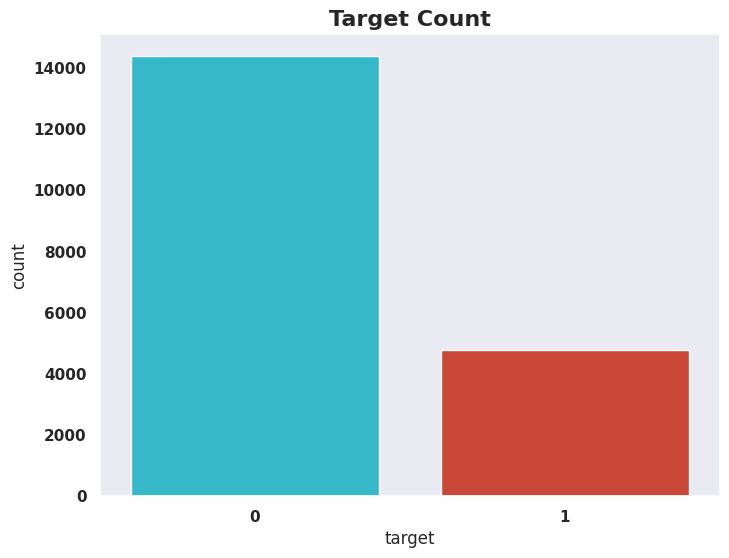

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x='target', data=dfs, palette = ['#1ECBE1', '#E1341E'])
plt.grid(False)
plt.title('Target Count', fontsize=16, fontweight='bold')
plt.show()

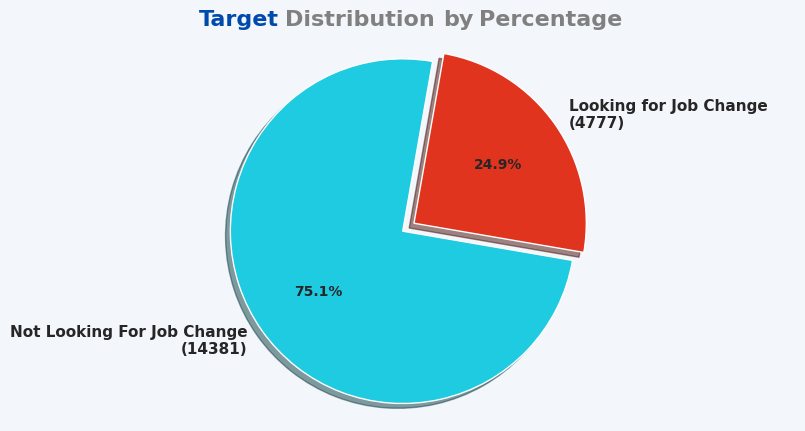

In [ ]:
# Assign value counts of target to target_counts variable
target_counts = dfs['target'].value_counts()

# Crate Pie Chart
fig, ax = plt.subplots(figsize=(10, 5))
fig.patch.set_facecolor('#F3F6FA')

plt.rcParams['font.size'] = 10
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.weight'] = 'bold'

wedges, texts, autotexts = ax.pie(target_counts,
                                   explode=(0.08, 0),
                                   labels=['Not Looking For Job Change', 'Looking for Job Change'],
                                   colors=['#1ECBE1', '#E1341E'],
                                   autopct='%1.1f%%',
                                   shadow=True,
                                   startangle=80)

plt.axis('equal')

# show text
for i, text in enumerate(texts):
    text.set(text=texts[i].get_text() + f'\n({target_counts.iloc[i]})')

plt.text(-1.25, 1.15, "Target", size=16, color='#004AAD', fontweight="bold")
plt.text(-0.75, 1.15, "Distribution", size=16, color="grey", fontweight="bold")
plt.text(0.17, 1.15, "by", size=16, color="grey")
plt.text(0.38, 1.15, "Percentage", size=16, color="grey", fontweight="bold")

plt.show()

##### **Analysis** :
- there is an imbalance data where percentage of candidate will not leave & not look for a job is 75.1% and percentage of candidate will leave & look for a job is 24,9%
- for the training model steps, the data classes will be balanced so that the machine learning does not tend to predict only the majority class

#### Numerical Data Distribution

##### Histplot and Boxplot

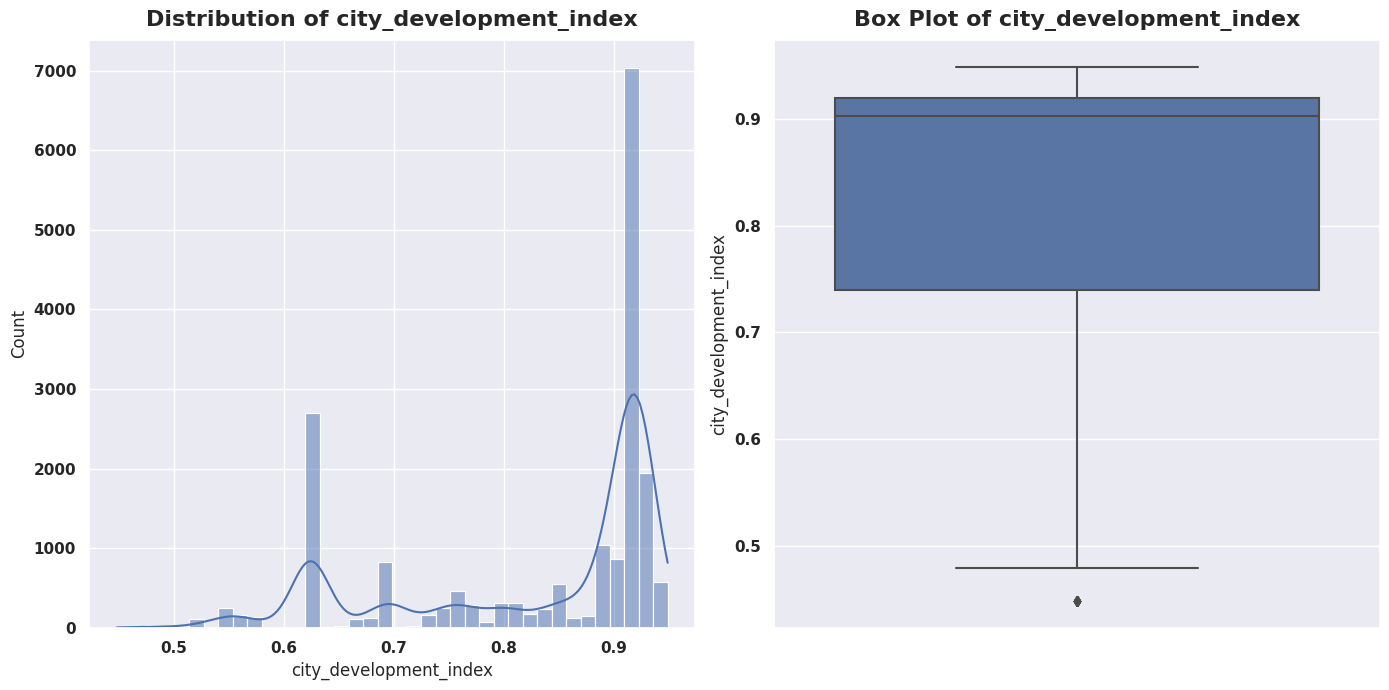

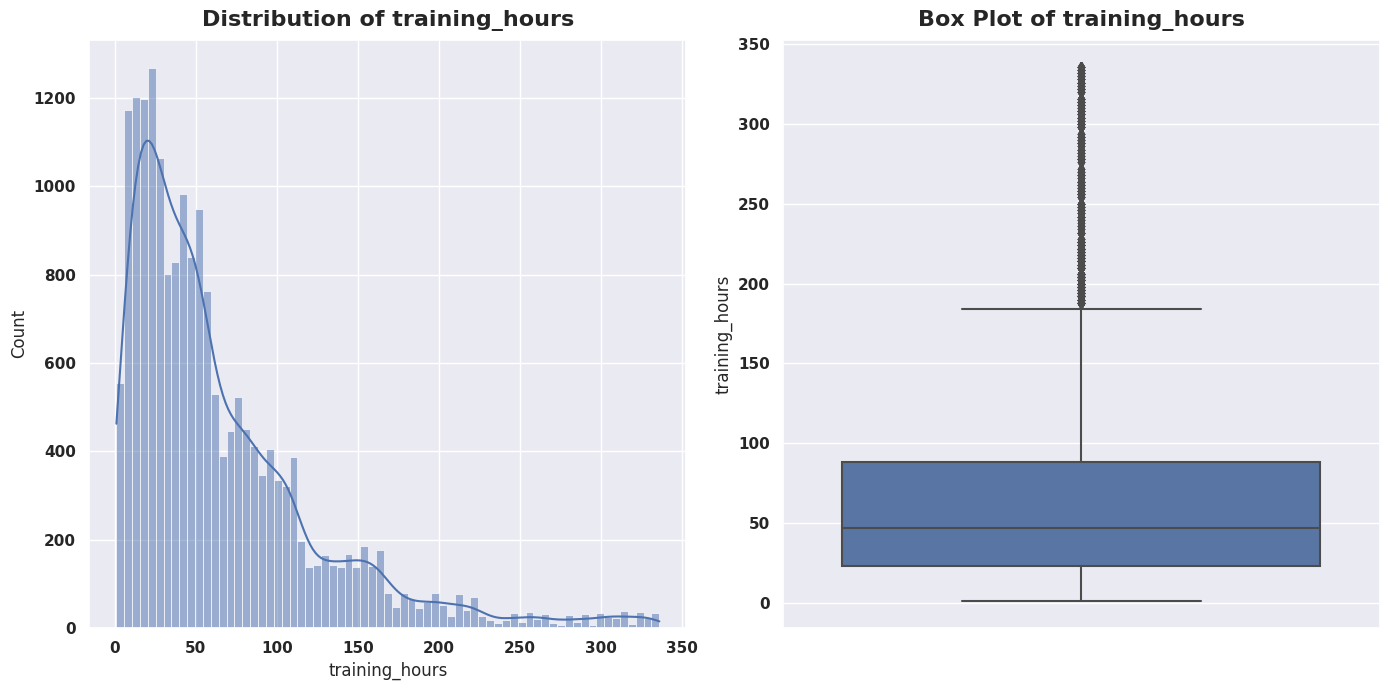

In [ ]:
feature_nums=['city_development_index','training_hours']
# Univariate analysis for numerical features
for feature in feature_nums:
    # Create a subplot for each numerical feature
    plt.figure(figsize=(14, 7))

    # Histogram for numerical features
    plt.subplot(1, 2, 1)
    sns.histplot(dfs[feature], kde=True)
    plt.title(f'Distribution of {feature}', size=16, fontweight='bold', pad=10)

    # Box plot for numerical features
    plt.subplot(1, 2, 2)
    sns.boxplot(y=dfs[feature])
    plt.title(f'Box Plot of {feature}', size=16, fontweight='bold', pad=10)

    plt.tight_layout()
    plt.show()

In [ ]:
# Calculating Curtosis
city_dev_index_kurtosis = dfs['city_development_index'].kurtosis()
th_kurtosis = dfs['training_hours'].kurtosis()

# Menginterpretasikan nilai kurtosis
if city_dev_index_kurtosis > 0:
    interpretasi_kurtosis_c = "Leptokurtik (lebih berpuncak dan berekor berat)"
elif city_dev_index_kurtosis < 0:
    interpretasi_kurtosis_c = "Platykurtik (lebih datar dan ekor ringan)"
else:
    interpretasi_kurtosis_c = "Mesokurtik (mirip dengan distribusi normal)"

if th_kurtosis > 0:
    interpretasi_kurtosis = "Leptokurtik (lebih berpuncak dan berekor berat)"
elif th_kurtosis < 0:
    interpretasi_kurtosis = "Platykurtik (lebih datar dan ekor ringan)"
else:
    interpretasi_kurtosis = "Mesokurtik (mirip dengan distribusi normal)"

# Show the result
print("Kurtosis dari City Development index", city_dev_index_kurtosis)
print(f"Interpretasi: {interpretasi_kurtosis_c}")

print("Kurtosis dari Training Hours", th_kurtosis)
print(f"Interpretasi: {interpretasi_kurtosis}")

Kurtosis dari City Development index -0.5385321590913694
Interpretasi: Platykurtik (lebih datar dan ekor ringan)
Kurtosis dari Training Hours 3.8405393627164734
Interpretasi: Leptokurtik (lebih berpuncak dan berekor berat)


In [ ]:
# Range: Difference between the maximum and minimum values
city_dev_index_range = dfs['city_development_index'].max() - dfs['city_development_index'].min()
th_range = dfs['training_hours'].max() - dfs['training_hours'].min()

# Variance: Measure of data point variability from the mean
city_dev_index_variance = dfs['city_development_index'].var()
th_variance = dfs['training_hours'].var()

# Standard Deviation: Average amount of deviation from the mean
city_dev_index_std_dev = dfs['city_development_index'].std()
th_std_dev = dfs['training_hours'].std()

# Interquartile Range (IQR): Spread between Q1 and Q3
city_dev_index_iqr = dfs['city_development_index'].quantile(0.75) - dfs['city_development_index'].quantile(0.25)
th_iqr = dfs['training_hours'].quantile(0.75) - dfs['training_hours'].quantile(0.25)

statistics_dfs_num = pd.DataFrame({
    'Statistik': ['Rentang', 'Varians', 'Deviasi Standar', 'Rentang Interkuartil (IQR)'],
    'City Development Index': [city_dev_index_range, city_dev_index_variance, city_dev_index_std_dev, city_dev_index_iqr],
    'Training Hours': [th_range, th_variance, th_std_dev, th_iqr]})

statistics_dfs_num

,Statistik,City Development Index,Training Hours
0,Rentang,0.501000,335.000000
1,Varians,0.015218,3607.018849
2,Deviasi Standar,0.123362,60.058462
3,Rentang Interkuartil (IQR),0.180000,65.000000


In [ ]:
# Outliers
# Calculate the lower and upper fences
lower_fence = dfs['city_development_index'].quantile(0.25) - 1.5 * city_dev_index_iqr
upper_fence = dfs['city_development_index'].quantile(0.75)+ 1.5 * city_dev_index_iqr

count_low = len(dfs[dfs['city_development_index'] < lower_fence])
count_up = len(dfs[dfs['city_development_index'] > upper_fence])

# Display the count
print(f"Lower Whisker for city development index: {lower_fence:.2f}")
print(f"Upper Whisker for city development index: {upper_fence:.2f}")
print(f"Jumlah data yang termasuk outliers < {lower_fence}: {count_low}")
print(f"Jumlah data yang termasuk outliers > {upper_fence}: {count_up}")

Lower Whisker for city development index: 0.47
Upper Whisker for city development index: 1.19
Jumlah data yang termasuk outliers < 0.4699999999999999: 17
Jumlah data yang termasuk outliers > 1.1900000000000002: 0


In [ ]:
# Outliers
# Calculate the lower and upper fences
lower_fence = dfs['training_hours'].quantile(0.25) - 1.5 *  th_iqr
upper_fence = dfs['training_hours'].quantile(0.75)+ 1.5 *  th_iqr

count_low = len(dfs[dfs['training_hours'] < lower_fence])
count_up = len(dfs[dfs['training_hours'] > upper_fence])

# Display the count
print(f"Lower Whisker for training hours: {lower_fence:.2f}")
print(f"Upper Whisker for training hours: {upper_fence:.2f}")
print(f"Jumlah data yang termasuk outliers < {lower_fence}: {count_low}")
print(f"Jumlah data yang termasuk outliers > {upper_fence}: {count_up}")

Lower Whisker for training hours: -74.50
Upper Whisker for training hours: 185.50
Jumlah data yang termasuk outliers < -74.5: 0
Jumlah data yang termasuk outliers > 185.5: 984


##### **Analysis** :

#### city_development_index column
- the distribution is ***negatively skewed*** 
- mean value is lower than median & modus. ***mean = 0.828848 < median = 0.903000 < modus = 0.920***
- ***platykurtic kurtosis type*** 
- By IQR Method, the lower limit gets 0.47 and upper limit gets 1.19. There are 17 data included as outliers.


#### training_hours column
- the distribution is ***positively skewed*** 
- mean value is higher than median & modus. ***mean = 65.366896 < median = 47 < modus = 28
- ***Leptokurtic kurtosis type*** 
- By IQR Method, the lower limit gets -74.5 nd upper limit gets 185.5. There are 984 data included as outliers

#### Distribution of Categorical Data

##### PIE CHART

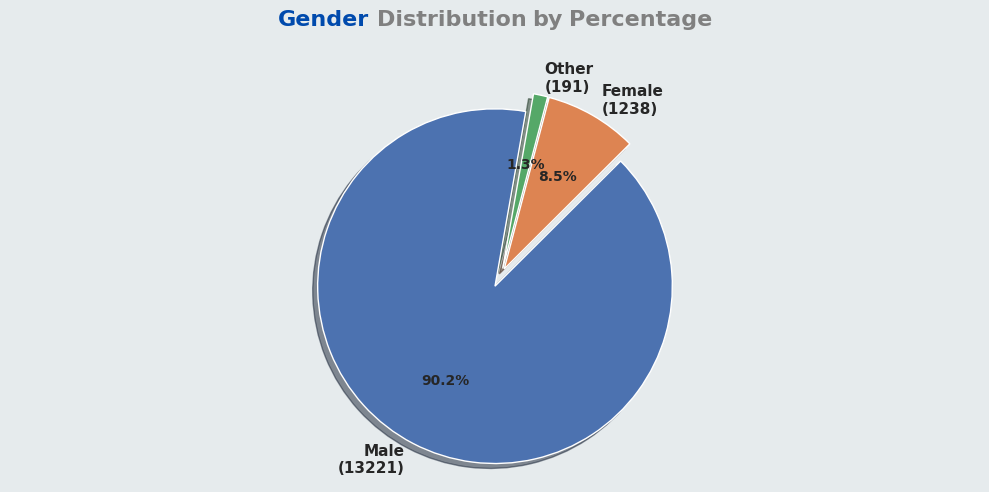

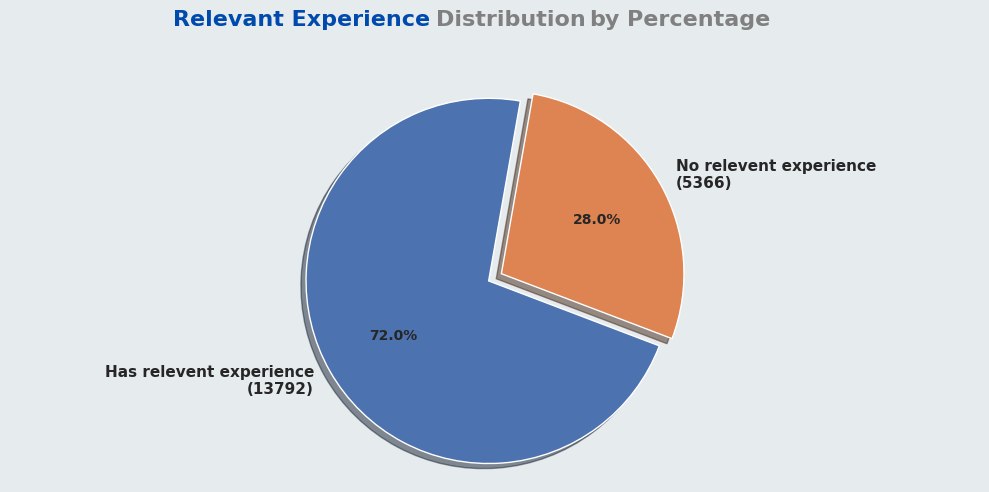

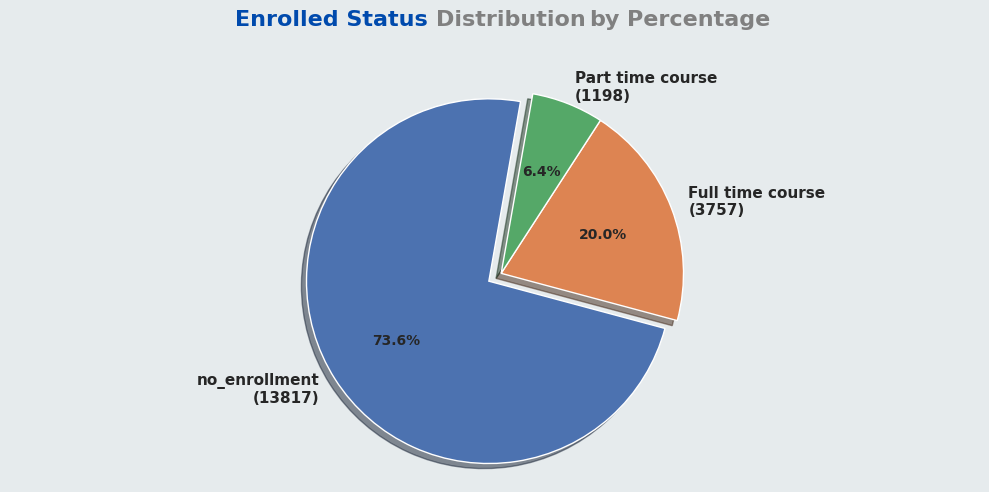

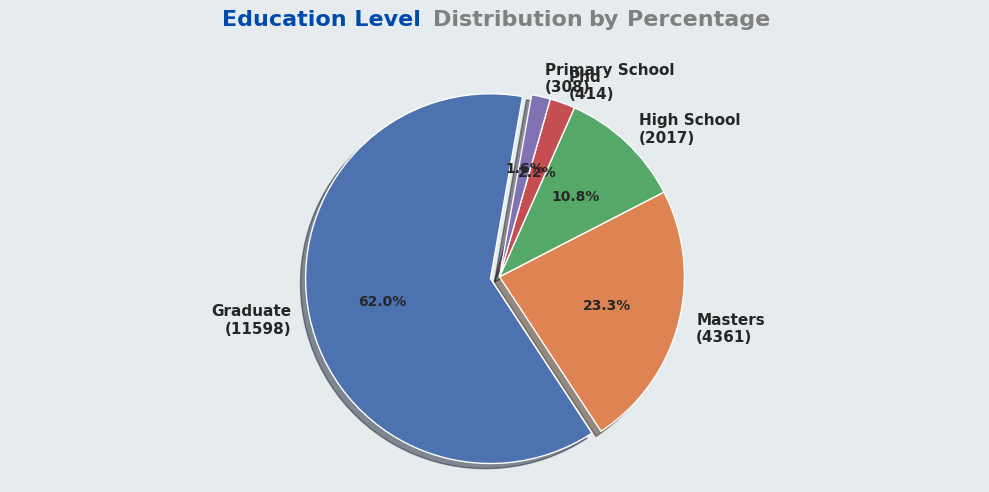

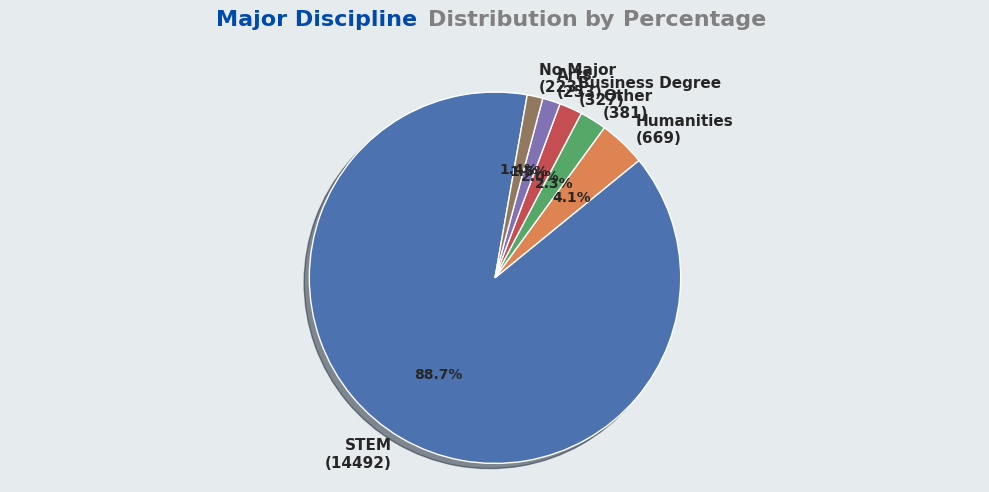

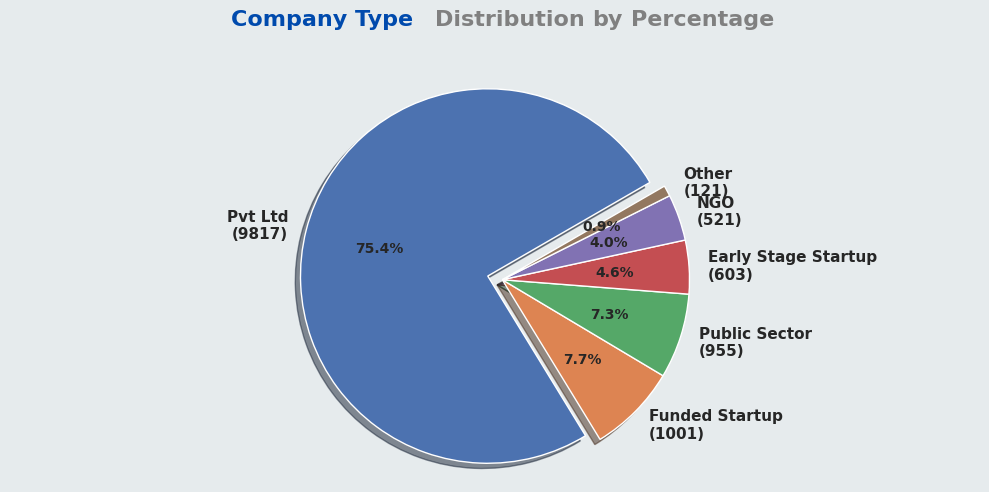

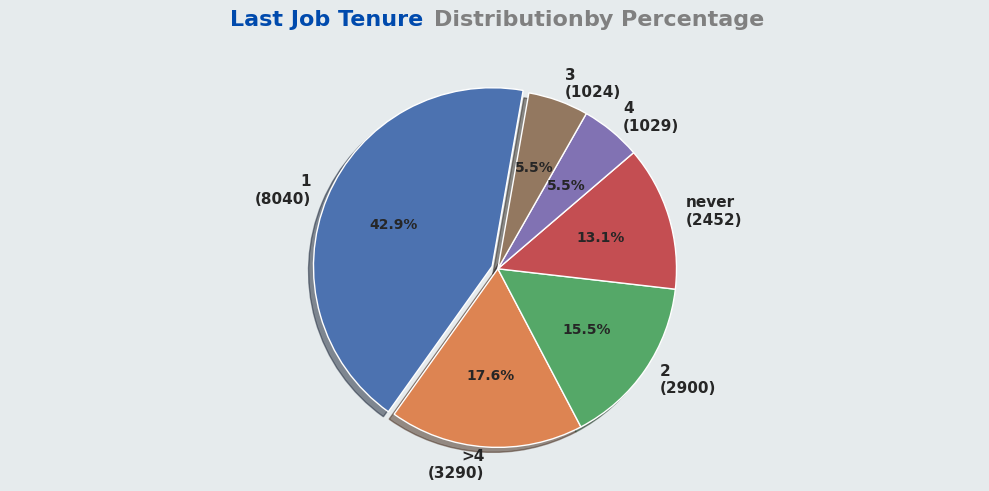

In [ ]:
# Gender
# Assign value counts of gender to gender_counts variable
gender_counts = dfs['gender'].value_counts()

# Create Pie Chart
fig, ax = plt.subplots(figsize=(10, 5))
fig.patch.set_facecolor('#e6ebed')

plt.rcParams['font.size'] = 10
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.weight'] = 'bold'

wedges, texts, autotexts = ax.pie(gender_counts,
                                   explode=[0.08] + [0.03]*(len(gender_counts)-1),
                                   labels=gender_counts.index,
                                   autopct='%1.1f%%',
                                   shadow=True,
                                   startangle=80)

plt.axis('equal')

# Show text
for i, text in enumerate(texts):
    text.set(text=texts[i].get_text() + f'\n({gender_counts.iloc[i]})')

plt.text(-1.26, 1.4, "Gender", size=16, color='#004AAD', fontweight="bold")
plt.text(-0.7, 1.4, "Distribution", size=16, color="grey", fontweight="bold")
plt.text(0.17, 1.4, "by", size=16, color="grey")
plt.text(0.38, 1.4, "Percentage", size=16, color="grey", fontweight="bold")

plt.tight_layout()
plt.show()

# Relevant Experience
# Assign value counts of relevant_experience to relevant_experience_counts variable
relevant_experience_counts = dfs['relevant_experience'].value_counts()

# Create Pie Chart
fig, ax = plt.subplots(figsize=(10, 5))
fig.patch.set_facecolor('#e6ebed')

plt.rcParams['font.size'] = 10
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.weight'] = 'bold'

wedges, texts, autotexts = ax.pie(relevant_experience_counts,
                                   explode=[0.08] + [0]*(len(relevant_experience_counts)-1),
                                   labels=relevant_experience_counts.index,
                                   autopct='%1.1f%%',
                                   shadow=True,
                                   startangle=80)

plt.axis('equal')

# Show text
for i, text in enumerate(texts):
    text.set(text=texts[i].get_text() + f'\n({relevant_experience_counts.iloc[i]})')

plt.text(-1.8, 1.36, "Relevant Experience", size=16, color='#004AAD', fontweight="bold")
plt.text(-0.36, 1.36, "Distribution", size=16, color="grey", fontweight="bold")
plt.text(0.48, 1.36, "by", size=16, color="grey")
plt.text(0.69, 1.36, "Percentage", size=16, color="grey", fontweight="bold")

plt.tight_layout()
plt.show()

# enrolled status
# Assign value counts of enrolled status to enrolled_status_counts variable
enrolled_status_counts = dfs['enrolled_status'].value_counts()

# Create Pie Chart
fig, ax = plt.subplots(figsize=(10, 5))
fig.patch.set_facecolor('#e6ebed')

plt.rcParams['font.size'] = 10
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.weight'] = 'bold'

wedges, texts, autotexts = ax.pie(enrolled_status_counts,
                                   explode=[0.08] + [0]*(len(enrolled_status_counts)-1),
                                   labels=enrolled_status_counts.index,
                                   autopct='%1.1f%%',
                                   shadow=True,
                                   startangle=80)

plt.axis('equal')

# Show text
for i, text in enumerate(texts):
    text.set(text=texts[i].get_text() + f'\n({enrolled_status_counts.iloc[i]})')

plt.text(-1.46, 1.36, "Enrolled Status", size=16, color='#004AAD', fontweight="bold")
plt.text(-0.36, 1.36, "Distribution", size=16, color="grey", fontweight="bold")
plt.text(0.48, 1.36, "by", size=16, color="grey")
plt.text(0.69, 1.36, "Percentage", size=16, color="grey", fontweight="bold")

plt.tight_layout()
plt.show()


# Education Level
# Assign value counts of education_level to education_level_counts variable
education_level_counts = dfs['education_level'].value_counts()

# Create Pie Chart
fig, ax = plt.subplots(figsize=(10, 5))
fig.patch.set_facecolor('#e6ebed')

plt.rcParams['font.size'] = 10
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.weight'] = 'bold'

wedges, texts, autotexts = ax.pie(education_level_counts,
                                   explode=[0.05] + [0]*(len(education_level_counts)-1),
                                   labels=education_level_counts.index,
                                   autopct='%1.1f%%',
                                   shadow=True,
                                   startangle=80)

plt.axis('equal')

# Show text
for i, text in enumerate(texts):
    text.set(text=texts[i].get_text() + f'\n({education_level_counts.iloc[i]})')

plt.text(-1.5, 1.36, "Education Level", size=16, color='#004AAD', fontweight="bold")
plt.text(-0.36, 1.36, "Distribution", size=16, color="grey", fontweight="bold")
plt.text(0.48, 1.36, "by", size=16, color="grey")
plt.text(0.69, 1.36, "Percentage", size=16, color="grey", fontweight="bold")

plt.tight_layout()
plt.show()


# Major Discipline
# Assign value counts of major_discipline to major_discipline_counts variable
major_discipline_counts = dfs['major_discipline'].value_counts()

# Create Pie Chart
fig, ax = plt.subplots(figsize=(10, 5))
fig.patch.set_facecolor('#e6ebed')

plt.rcParams['font.size'] = 10
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.weight'] = 'bold'

wedges, texts, autotexts = ax.pie(major_discipline_counts,

                                   labels=major_discipline_counts.index,
                                   autopct='%1.1f%%',
                                   shadow=True,
                                   startangle=80)

plt.axis('equal')

# Show text
for i, text in enumerate(texts):
    text.set(text=texts[i].get_text() + f'\n({major_discipline_counts.iloc[i]})')

plt.text(-1.5, 1.36, "Major Discipline", size=16, color='#004AAD', fontweight="bold")
plt.text(-0.36, 1.36, "Distribution", size=16, color="grey", fontweight="bold")
plt.text(0.48, 1.36, "by", size=16, color="grey")
plt.text(0.69, 1.36, "Percentage", size=16, color="grey", fontweight="bold")

plt.tight_layout()
plt.show()


# Company Type
# Assign value counts of company_type to company_type_counts variable
company_type_counts = dfs['company_type'].value_counts()

# Create Pie Chart
fig, ax = plt.subplots(figsize=(10, 5))
fig.patch.set_facecolor('#e6ebed')

plt.rcParams['font.size'] = 10
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.weight'] = 'bold'

wedges, texts, autotexts = ax.pie(company_type_counts,
                                   explode=[0.08] + [0]*(len(company_type_counts)-1),
                                   labels=company_type_counts.index,
                                   autopct='%1.1f%%',
                                   shadow=True,
                                   startangle=30)

plt.axis('equal')

# Show text
for i, text in enumerate(texts):
    text.set(text=texts[i].get_text() + f'\n({company_type_counts.iloc[i]})')

plt.text(-1.45, 1.36, "Company Type", size=16, color='#004AAD', fontweight="bold")
plt.text(-0.36, 1.36, "Distribution", size=16, color="grey", fontweight="bold")
plt.text(0.48, 1.36, "by", size=16, color="grey")
plt.text(0.69, 1.36, "Percentage", size=16, color="grey", fontweight="bold")

plt.tight_layout()
plt.show()

# Last Job Tenure
# Assign value counts of last_job_tenure to last_job_tenure_counts variable
last_job_tenure_counts = dfs['last_job_tenure'].value_counts()

# Create Pie Chart
fig, ax = plt.subplots(figsize=(10, 5))
fig.patch.set_facecolor('#e6ebed')

plt.rcParams['font.size'] = 10
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.weight'] = 'bold'

wedges, texts, autotexts = ax.pie(last_job_tenure_counts,
                                   explode=[0.035] + [0]*(len(last_job_tenure_counts)-1),
                                   labels=last_job_tenure_counts.index,
                                   autopct='%1.1f%%',
                                   shadow=True,
                                   startangle=80)

plt.axis('equal')

# Show text
for i, text in enumerate(texts):
    text.set(text=texts[i].get_text() + f'\n({last_job_tenure_counts.iloc[i]})')

plt.text(-1.5, 1.36, "Last Job Tenure", size=16, color='#004AAD', fontweight="bold")
plt.text(-0.36, 1.36, "Distribution", size=16, color="grey", fontweight="bold")
plt.text(0.48, 1.36, "by", size=16, color="grey")
plt.text(0.69, 1.36, "Percentage", size=16, color="grey", fontweight="bold")

plt.tight_layout()
plt.show()


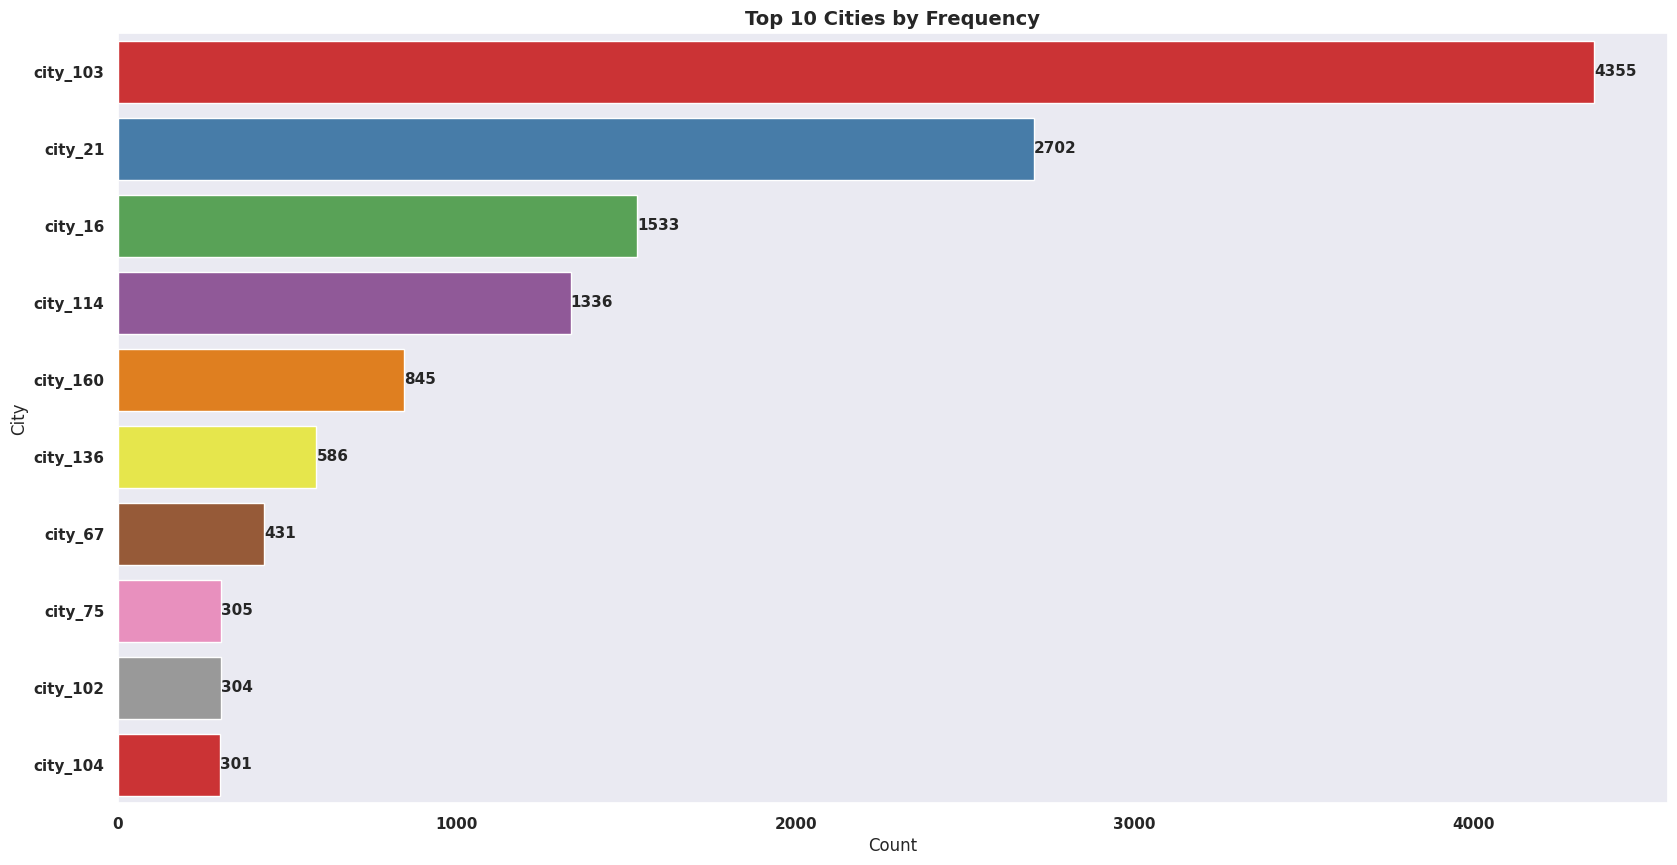

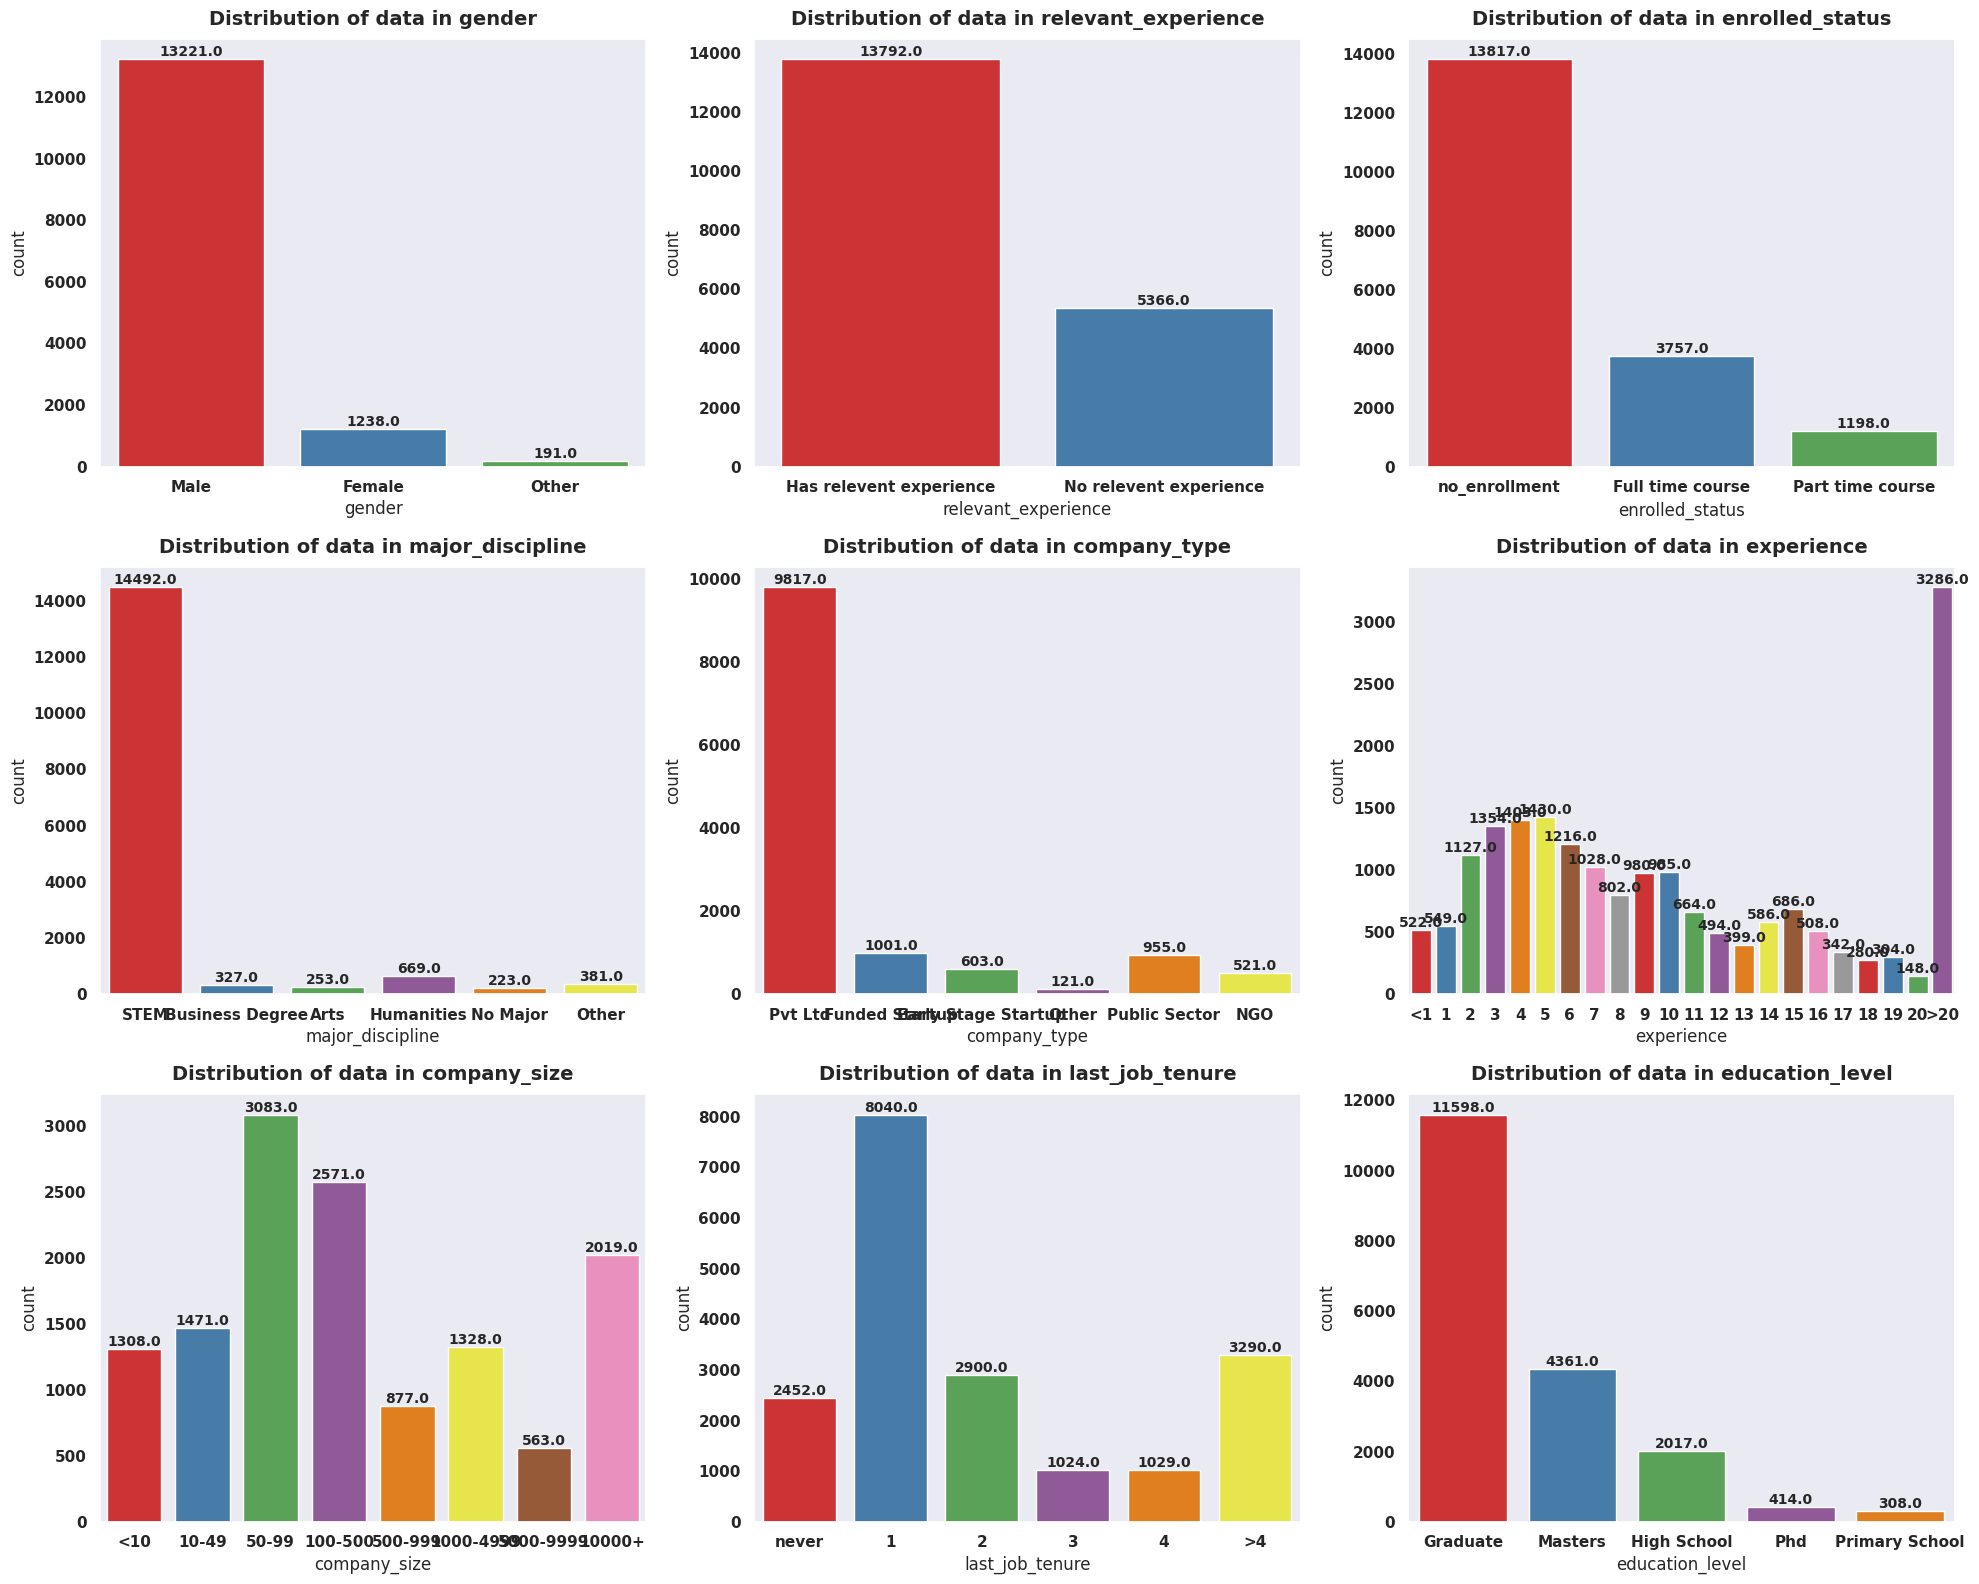

In [ ]:
# Plot for 'city'
plt.figure(figsize=(20, 10))
data_city = dfs['city'].value_counts().head(10)
sns.barplot(y=data_city.index, x=data_city, palette="Set1")
plt.title('Top 10 Cities by Frequency', fontweight='bold',  size=14)
plt.xlabel('Count')
plt.ylabel('City')
plt.grid(False)
for i, v in enumerate(data_city):
    plt.text(v, i, str(v), ha='left', va='center', fontsize=11)
plt.show()

# Plot for the rest of categorical features
fig, axes = plt.subplots(3, 3, figsize=(20, 16))
axes = axes.ravel()  # Flatten the axes array

cats_feature=[ 'gender', 'relevant_experience', 'enrolled_status',
              'major_discipline', 'company_type',
               'experience', 'company_size', 'last_job_tenure', 'education_level']

# Define the order for each feature
orders = [
    None,  # order for 'gender'
    None,  # order for 'relevant_experience'
    None,  # order for 'enrolled_status'
    None,  # order for 'major_discipline'
    None,  # order for 'company_type'
    ['<1','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','>20'],  # order for 'experience'
    ['<10','10-49','50-99','100-500','500-999','1000-4999', '5000-9999', '10000+'],  # order for 'company_size'
    ['never','1','2','3','4','>4'],  # order for 'last_job_tenure'
    None,
]

for i, feature in enumerate(cats_feature):
    sns.countplot(data=dfs, x=feature, order=orders[i], palette='Set1', ax=axes[i])
    axes[i].set_title(f'Distribution of data in {feature}', size=14, fontweight='bold', pad=10)
    axes[i].grid(False)
    total_count = len(df)
    for p in axes[i].patches:
        height = p.get_height()
        axes[i].annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom', size=10)

plt.tight_layout()
plt.show()

##### **Analysis** :
Based on the frequency of each value in a certain column, data that has a very small frequency (<2% after re-categorization) will be removed

***column***
- column gender for the 'other' category will be removed because it is only 1% of the total data
- 'education_level' will be re-evaluated to see if the data is important for the 'Phd' and 'Primary School' categories
- value of 'major_discipline' would be replaced to :
        * STEM = 'STEM'
        * Non STEM = 'humanities', 'business degree', 'arts', 'other'
        * No major = 'no_major'
- 'experience' would be grouped into a range
- 'company_size' will be re-grouped to be more general.
- 'company_type' for the 'other' category will be deleted because it contains very less frequency (121/1158).
- 'last_job_tenure' would be re-categorized



### Multivariate Analysis (10 Poin)

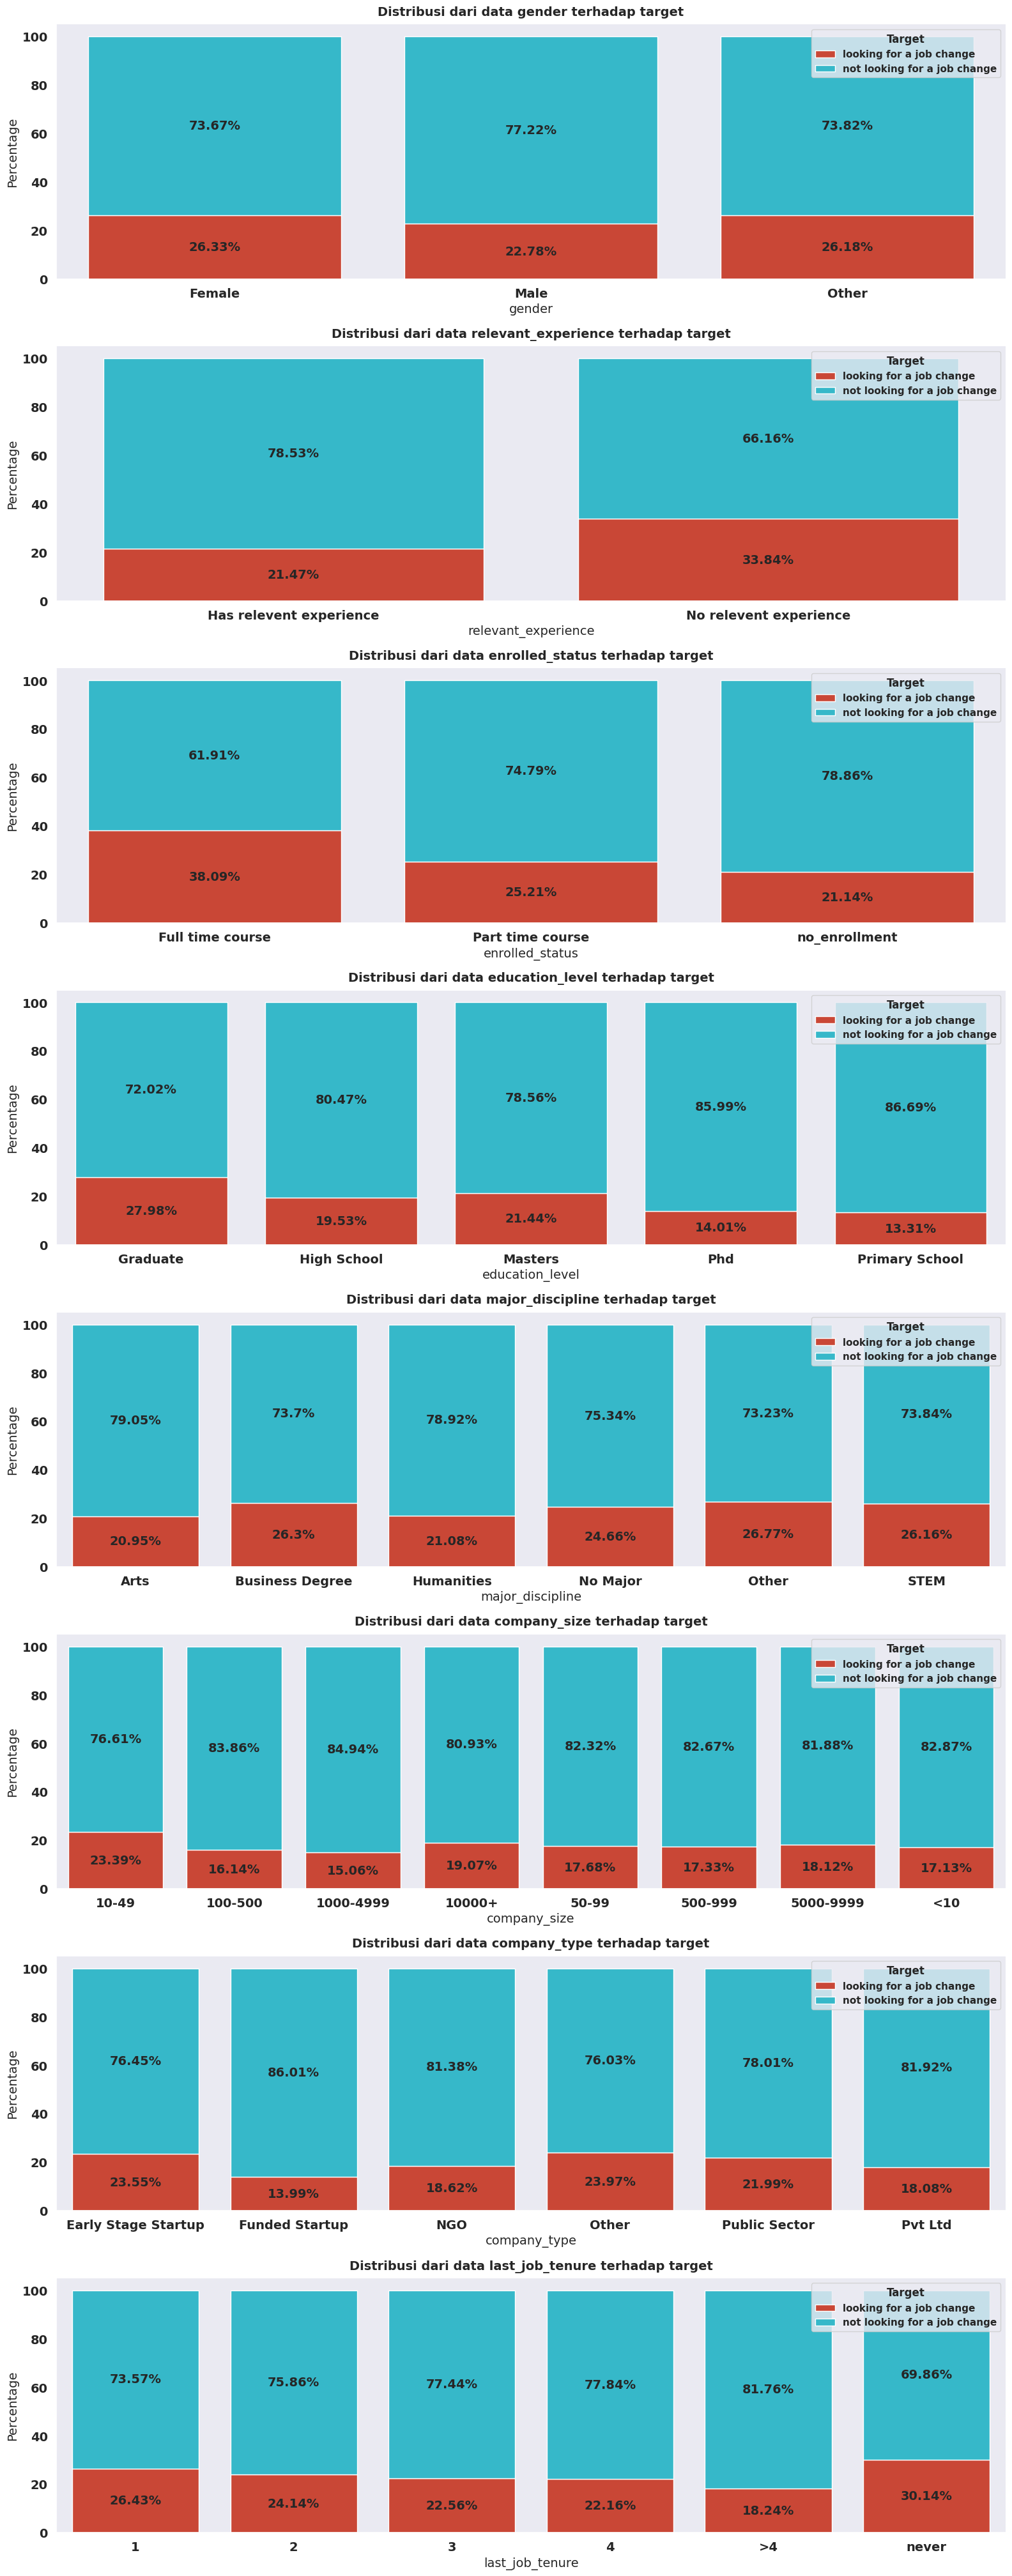

In [ ]:
# Memisahkan kolom berdasarkan tipe data
categorical_columns = ['gender', 'relevant_experience', 'enrolled_status', 'education_level', 'major_discipline', 'company_size', 'company_type', 'last_job_tenure']
target_column = 'target'

plt.figure(figsize=(16, 50))
for i, column in enumerate(categorical_columns):
    plt.subplot(10, 1, i+1)

    # Membuat crosstab antara kolom kategorikal dan kolom target
    crosstab = pd.crosstab(dfs[column], dfs[target_column])
    crosstab_percentage = crosstab.div(crosstab.sum(1), axis=0) * 100  # Menghitung persentase

    # Membuat stacked bar chart
    ax = sns.barplot(x=crosstab_percentage.index, y=crosstab_percentage[1], color='#E1341E', label='looking for a job change')
    ax = sns.barplot(x=crosstab_percentage.index, y=crosstab_percentage[0], color='#1ECBE1', label='not looking for a job change', bottom=crosstab_percentage[1])

    for c in ax.containers:
        labels = [str(round(v.get_height(), 2)) + "%" if v.get_height() > 0 else '' for v in c]
        ax.bar_label(c,
                 label_type='center',
                 labels = labels,
                 size = 14) # add a container object "c" as first argument
    # Remove spines
    for s in ["top", "right"]:
        ax.spines[s].set_visible(False)
    # Add labels
    ax.tick_params(labelsize = 14, labelrotation = 0)
    ax.set_ylabel("Percentage", size = 14)
    ax.set_xlabel(column, size = 14)
    # Add legend
    ax.legend(fontsize = 12,
          title = "Target",
          title_fontsize = 18,
          bbox_to_anchor = [0.55, 0.7])


    plt.xticks(rotation=0)
    plt.xlabel(column)
    plt.ylabel('Percentage')
    plt.title(f'Distribusi dari data {column} terhadap {target_column}', size=14, fontweight='bold', pad=10)
    plt.legend(title='Target', loc='upper right')
    plt.grid(False)



plt.tight_layout()
plt.show()

#### Staistical Analysis

In [ ]:
categoric = dfs.select_dtypes('object')
# Create an empty DataFrame to store the chi-square results
chi_square_results = pd.DataFrame(columns=['Feature', 'Chi-Square', 'P-Value'])

# Calculate chi-square for each categorical feature
for feature in categoric :
    contingency_table = pd.crosstab(dfs[feature], dfs['target'])
    chi2, p, _, _ = chi2_contingency(contingency_table)


    # Create a temporary DataFrame and concatenate it to the results DataFrame
    temp_df = pd.DataFrame({'Feature' : [feature], 'Chi-Square' : [chi2], 'P-Value' : [p]})
    chi_square_results = pd.concat([chi_square_results, temp_df], ignore_index=True)


# Save the results to a CSV file
chi_square_results.to_csv('chi_square_results.csv', index=False)

# Print the chi square result Ordered by strongest Correlation
chi_squaresult = pd.read_csv('chi_square_results.csv')
chi_squaresult = chi_squaresult.sort_values(by=['Chi-Square'],ascending=False)

# adding correlation column in chi square result
chi_squaresult['Correlation'] = chi_squaresult['P-Value'].apply(lambda p: 'Significant' if p < 0.05 else 'Not Significant')
chi_squaresult.to_csv('chi_square_results.csv', index=False)
chi_square_resultsn = pd.read_csv('chi_square_results.csv')
chi_square_resultsn

,Feature,Chi-Square,P-Value,Correlation
0,enrollee_id,19158.000000,4.966032e-01,Not Significant
1,target,19152.657731,0.000000e+00,Significant
2,city,2998.777229,0.000000e+00,Significant
3,experience,701.573963,6.174681e-135,Significant
4,enrolled_status,455.166762,1.451421e-99,Significant
5,relevant_experience,315.338577,1.500663e-70,Significant
6,education_level,165.655389,8.949048e-35,Significant
7,last_job_tenure,132.499484,7.015170e-27,Significant
8,company_size,45.531755,1.078133e-07,Significant
9,company_type,35.035475,1.480320e-06,Significant


enrolled_id column is not significant related to target column, so it could be deleted

#### Numerical Columns

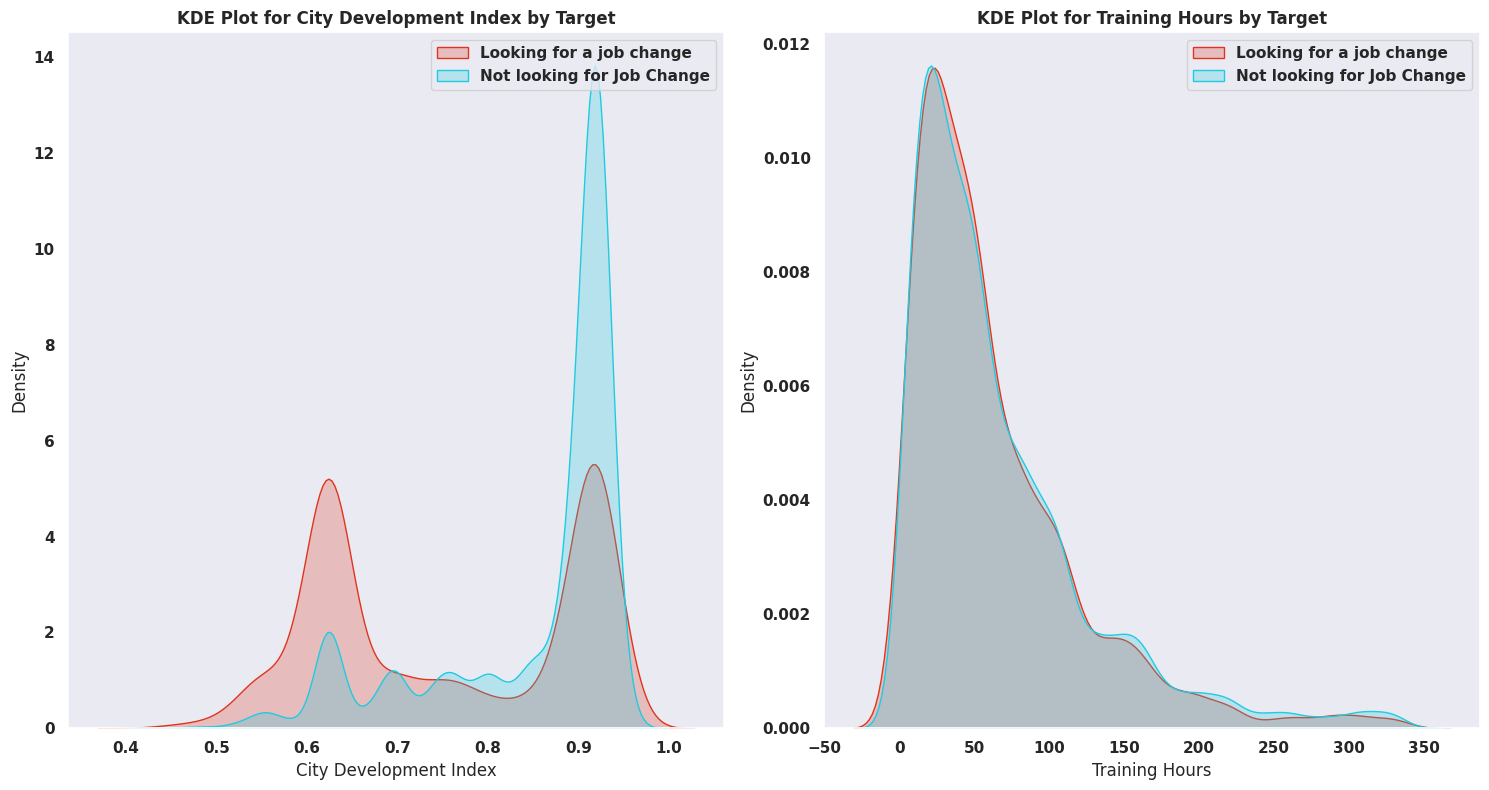

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15, 8))

# KDE plot for 'city_development_index' with 'target' distribution
sns.kdeplot(data=dfs[dfs['target'] == 1]['city_development_index'], label='Looking for a job change', shade=True, color='#E1341E', ax=axs[0])
sns.kdeplot(data=dfs[dfs['target'] == 0]['city_development_index'], label='Not looking for Job Change', shade=True, color='#1ECBE1', ax=axs[0])
axs[0].set_xlabel('City Development Index')
axs[0].set_ylabel('Density')
axs[0].set_title('KDE Plot for City Development Index by Target', fontweight='bold')
axs[0].grid(False)
axs[0].legend()

# KDE plot for 'training_hours' with 'target' distribution
sns.kdeplot(data=dfs[dfs['target'] == 1]['training_hours'], label='Looking for a job change', shade=True, color='#E1341E', ax=axs[1])
sns.kdeplot(data=dfs[dfs['target'] == 0]['training_hours'], label='Not looking for Job Change', shade=True, color='#1ECBE1', ax=axs[1])
axs[1].set_xlabel('Training Hours')
axs[1].set_ylabel('Density')
axs[1].set_title('KDE Plot for Training Hours by Target', fontweight='bold')
axs[1].grid(False)
axs[1].legend()

plt.tight_layout()
plt.show()

- ***City_Development_Index***

It can be seen that candidates who live in cities with low city development tend to be
to leave the company after training while the candidate lives in the city with
high city development index, tend not to leave the company after training.

- ***Training Hours***

It can be seen that training hours does not have a significant impact on candidate decisions
to stay / leave the company

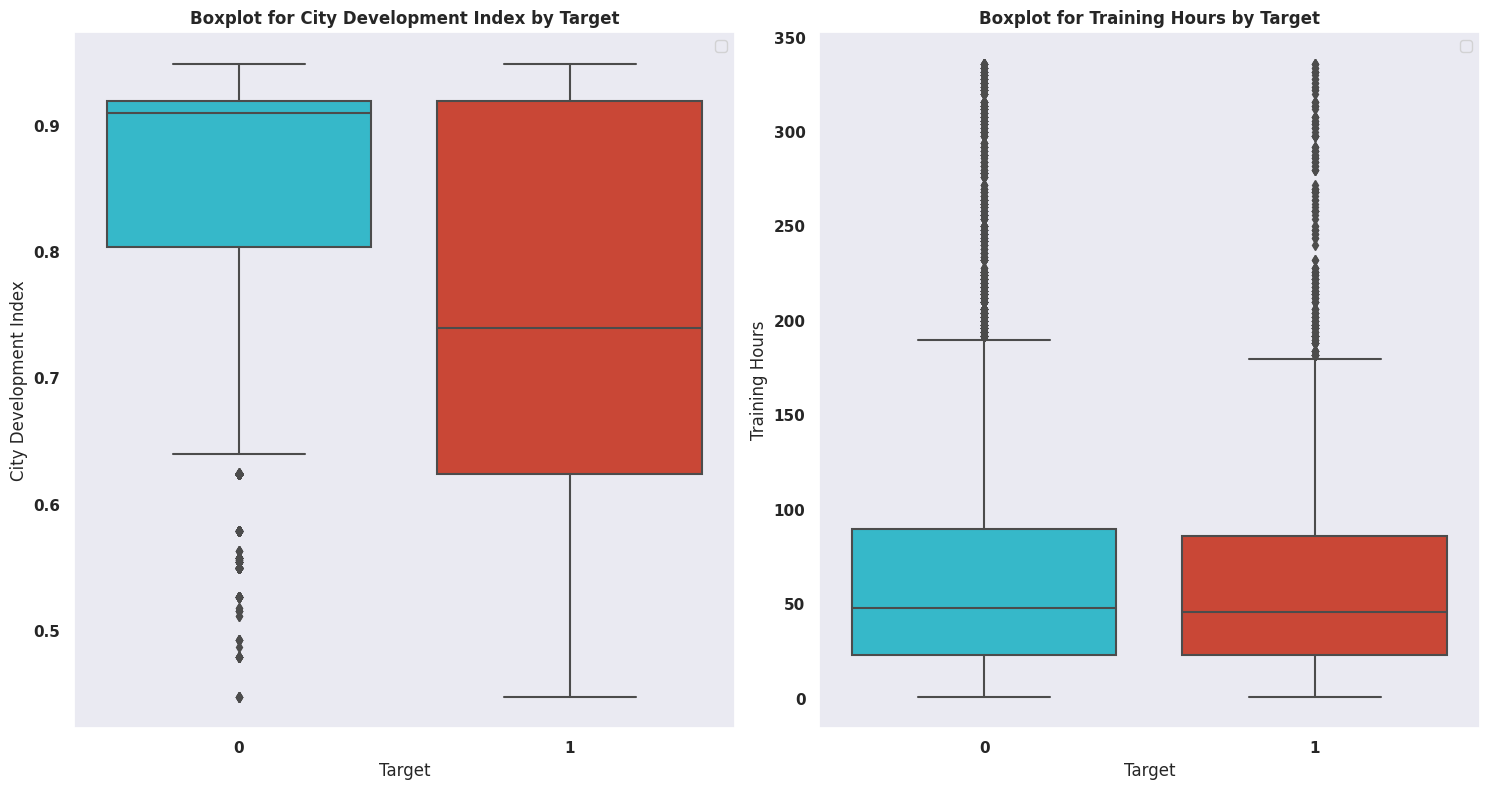

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15,8))

# Boxplot for 'city_development_index' with 'target' distribution
sns.boxplot(data=dfs, x='target', y='city_development_index', palette={0: '#1ECBE1', 1: '#E1341E'}, ax=axs[0])
axs[0].set_xlabel('Target')
axs[0].set_ylabel('City Development Index')
axs[0].set_title('Boxplot for City Development Index by Target', fontweight='bold')
axs[0].grid(False)
axs[0].legend()

# Boxplot for 'training_hours' with 'target' distribution
sns.boxplot(data=dfs, x='target', y='training_hours', palette={0: '#1ECBE1', 1: '#E1341E'}, ax=axs[1])
axs[1].set_xlabel('Target')
axs[1].set_ylabel('Training Hours')
axs[1].set_title('Boxplot for Training Hours by Target', fontweight='bold')
axs[1].grid(False)
axs[1].legend()

plt.tight_layout()
plt.grid(False)

#### Statistical Analysis

In [ ]:
#menyiapkan list baru untuk menampung nilai p-value & column
p_value_array, cols = [], []

# menghitung P-Value antara kolom numerikal dengan data target
for variable in nums[:-1]:
    groups = [dfs[dfs['target'] == target][variable] for target in dfs['target'].unique()]
    f_statistic, p_value =  stats.ttest_ind(*groups)

    p_value_array.append(p_value)
    cols.append(variable)

#masukan hasi p-value kedalam dataframe baru
uji_test = pd.DataFrame({'Cols':cols,
                         'P-Value':p_value_array})

uji_test['Keterangan'] = ['Terdapat perbedaan signifikan' if x < 0.05 else 'Tidak terdapat perbedaan signifikan' for x in uji_test['P-Value']]
uji_test

,Cols,P-Value,Keterangan
0,city_development_index,0.00000,Terdapat perbedaan signifikan
1,training_hours,0.00282,Terdapat perbedaan signifikan


Based on the results of statistical analysis, the two predictor variables, namely city_development index and training_hours, have a significant effect on the candidate's decision to leave the company or stay at the company after receiving training. However, based on the distribution curve in the training hours column, it shows that the candidate's decision to stay or leave the company cannot be seen from training_hours, therefore training_hours does not need to be included in machine learning processing

### Correlation Map

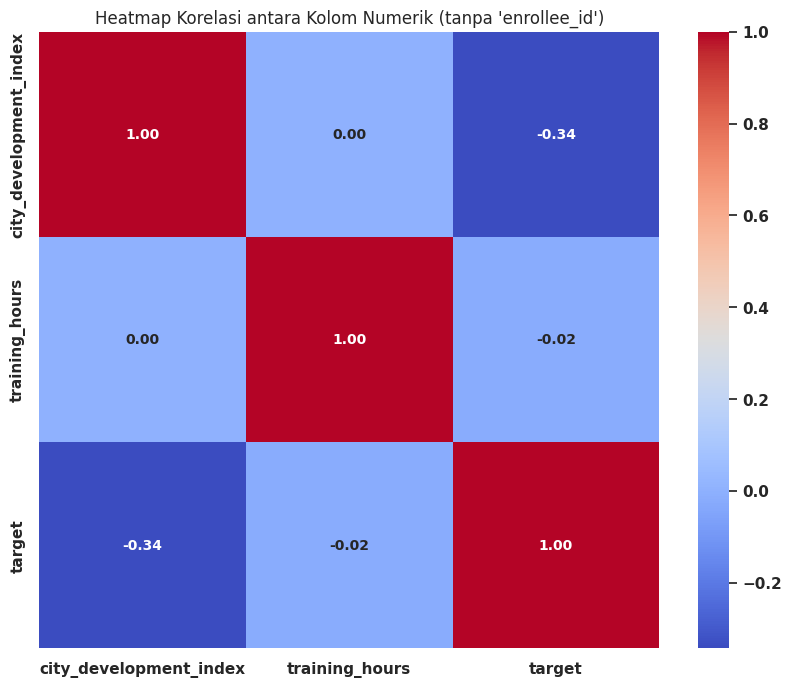

In [ ]:
# korelasi numerik menggunakan heat map
# Selecting numeric columns (excluding 'enrollee_id')
numeric_cols = df.select_dtypes(include=['int64', 'float64']).drop(columns=['enrollee_id'])

# Calculating the correlation between numeric columns
correlation_matrix = numeric_cols.corr()

# Creating a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap Korelasi antara Kolom Numerik (tanpa 'enrollee_id')")
plt.show()

From the heatmap it can be seen that the city development index has a strong relationship to target. Apart from that, another variable, namely Training_hour, has a weak relationship to target 

# Stage 2 - Preprocessing
(please hide this markdown to view stage 3)

## 1. Data Cleansing

### A. Handle Missing Value

In [ ]:
#creates a copy of dfs dataframe for preprocessing
dfk = dfs.copy()

# Checking missing values
dfk.isna().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevant_experience          0
enrolled_status            386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_job_tenure            423
training_hours               0
target                       0
dtype: int64

Handling Missing Values with Imputation Method

In [ ]:
# Values to fill in missing data
imputer = {'gender' : 'Female',
           'enrolled_status' : 'Full time course',
           'education_level' : 'High School',
           'major_discipline' : 'Business Degree',
           'experience' : '15',
           'company_type' : 'Funded Startup',
           'company_size' : '1000-4999' ,
           'last_job_tenure' : '2'}

# fill missing value with values from the imputer dictionary.
dfk.fillna(value=imputer, inplace=True)

In [ ]:
dfk.isna().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevant_experience       0
enrolled_status           0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_job_tenure           0
training_hours            0
target                    0
dtype: int64

### B. Handle Duplicated Data

In [ ]:
#checking duplicated data for overall dataset
dfk.duplicated().sum()

0

### C. Feature Transformation<br>
Re-categorize value so that categories become more general and reduce unique value.

education_level : Highschool and primary school = non-degree holder

In [ ]:
# Drop 'other' value on gender columns
dfk = dfk[dfk['gender'] != 'Other']
dfk = dfk[dfk['company_type'] != 'Other']

# city_development_index
conditions_city = [
    (dfk['city_development_index'] > 0.8),
    (dfk['city_development_index'] >= 0.6) & (dfk['city_development_index'] < 0.8),
    (dfk['city_development_index'] < 0.6)
]

choices_city = ['Highly Developed Cities', 'Moderately Developed Cities', 'Less Developed Cities']
dfk['city_category'] = np.select(conditions_city, choices_city, default='Unknown')

# last_job_tenure
conditions_last_job = [
    (dfk['last_job_tenure'] == '>4'),
    (dfk['last_job_tenure'] >= '2') & (dfk['last_job_tenure'] <= '4'),
    (dfk['last_job_tenure'].isin(['1', '<1']))
]

choices_last_job = ['High Tenure', 'Medium Tenure', 'Low Tenure']
dfk['job_tenure_category'] = np.select(conditions_last_job,
                                         choices_last_job,
                                         default='Never')

# experience
def categorize_experience(experience):
    if experience in ['10', '11', '12', '13', '14',
                      '15', '16', '17', '18', '19', '20', '>20']:
        return 'Senior Level'
    elif experience in ['4', '5', '6', '7', '8', '9']:
        return 'Intermediate Level'
    elif experience in ['<1', '1', '2', '3']:
        return 'Junior Level'
    return 'Unknown'

dfk['experience_category'] = dfk['experience'].apply(categorize_experience)

# company_size
conditions_company_size = [
    (dfk['company_size'].isin(['<10', '10-49', '50-99'])),
    (dfk['company_size'].isin(['100-500', '500-999'])),
    (dfk['company_size'].isin(['1000-4999', '5000-9999', '10000+']))
]

choices_company_size = ['Small', 'Medium', 'Large']
dfk['company_size_category'] = np.select(conditions_company_size, choices_company_size, default='Unknown')


# education level (fixed)
def edu(level):
    if level in ['Primary School', 'High School']:
        return 'Non Degree Holder'
    elif level in 'Masters':
        return 'Masters'
    elif level in 'Graduate':
        return 'Graduate'
    else:
        return 'Phd'

dfk['edulevel'] = dfk['education_level'].apply(edu)

In [ ]:
dfk.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevant_experience', 'enrolled_status', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_job_tenure', 'training_hours', 'target', 'city_category',
       'job_tenure_category', 'experience_category', 'company_size_category',
       'edulevel'],
      dtype='object')

In [ ]:
new_cat_feature = ['city_category','job_tenure_category',
                   'experience_category', 'company_size_category', 'edulevel']
for col in new_cat_feature:
    print(f'''Value Count column {col}:''')
    print(dfk[col].value_counts())
    print()

Value Count column city_category:
Highly Developed Cities        12943
Moderately Developed Cities     5189
Less Developed Cities            715
Name: city_category, dtype: int64

Value Count column job_tenure_category:
Low Tenure       7909
Medium Tenure    5297
High Tenure      3232
Never            2409
Name: job_tenure_category, dtype: int64

Value Count column experience_category:
Senior Level          8609
Intermediate Level    6759
Junior Level          3479
Name: experience_category, dtype: int64

Value Count column company_size_category:
Large     9683
Small     5765
Medium    3399
Name: company_size_category, dtype: int64

Value Count column edulevel:
Graduate             11407
Masters               4309
Non Degree Holder     2722
Phd                    409
Name: edulevel, dtype: int64



## Visual after Data Cleansing

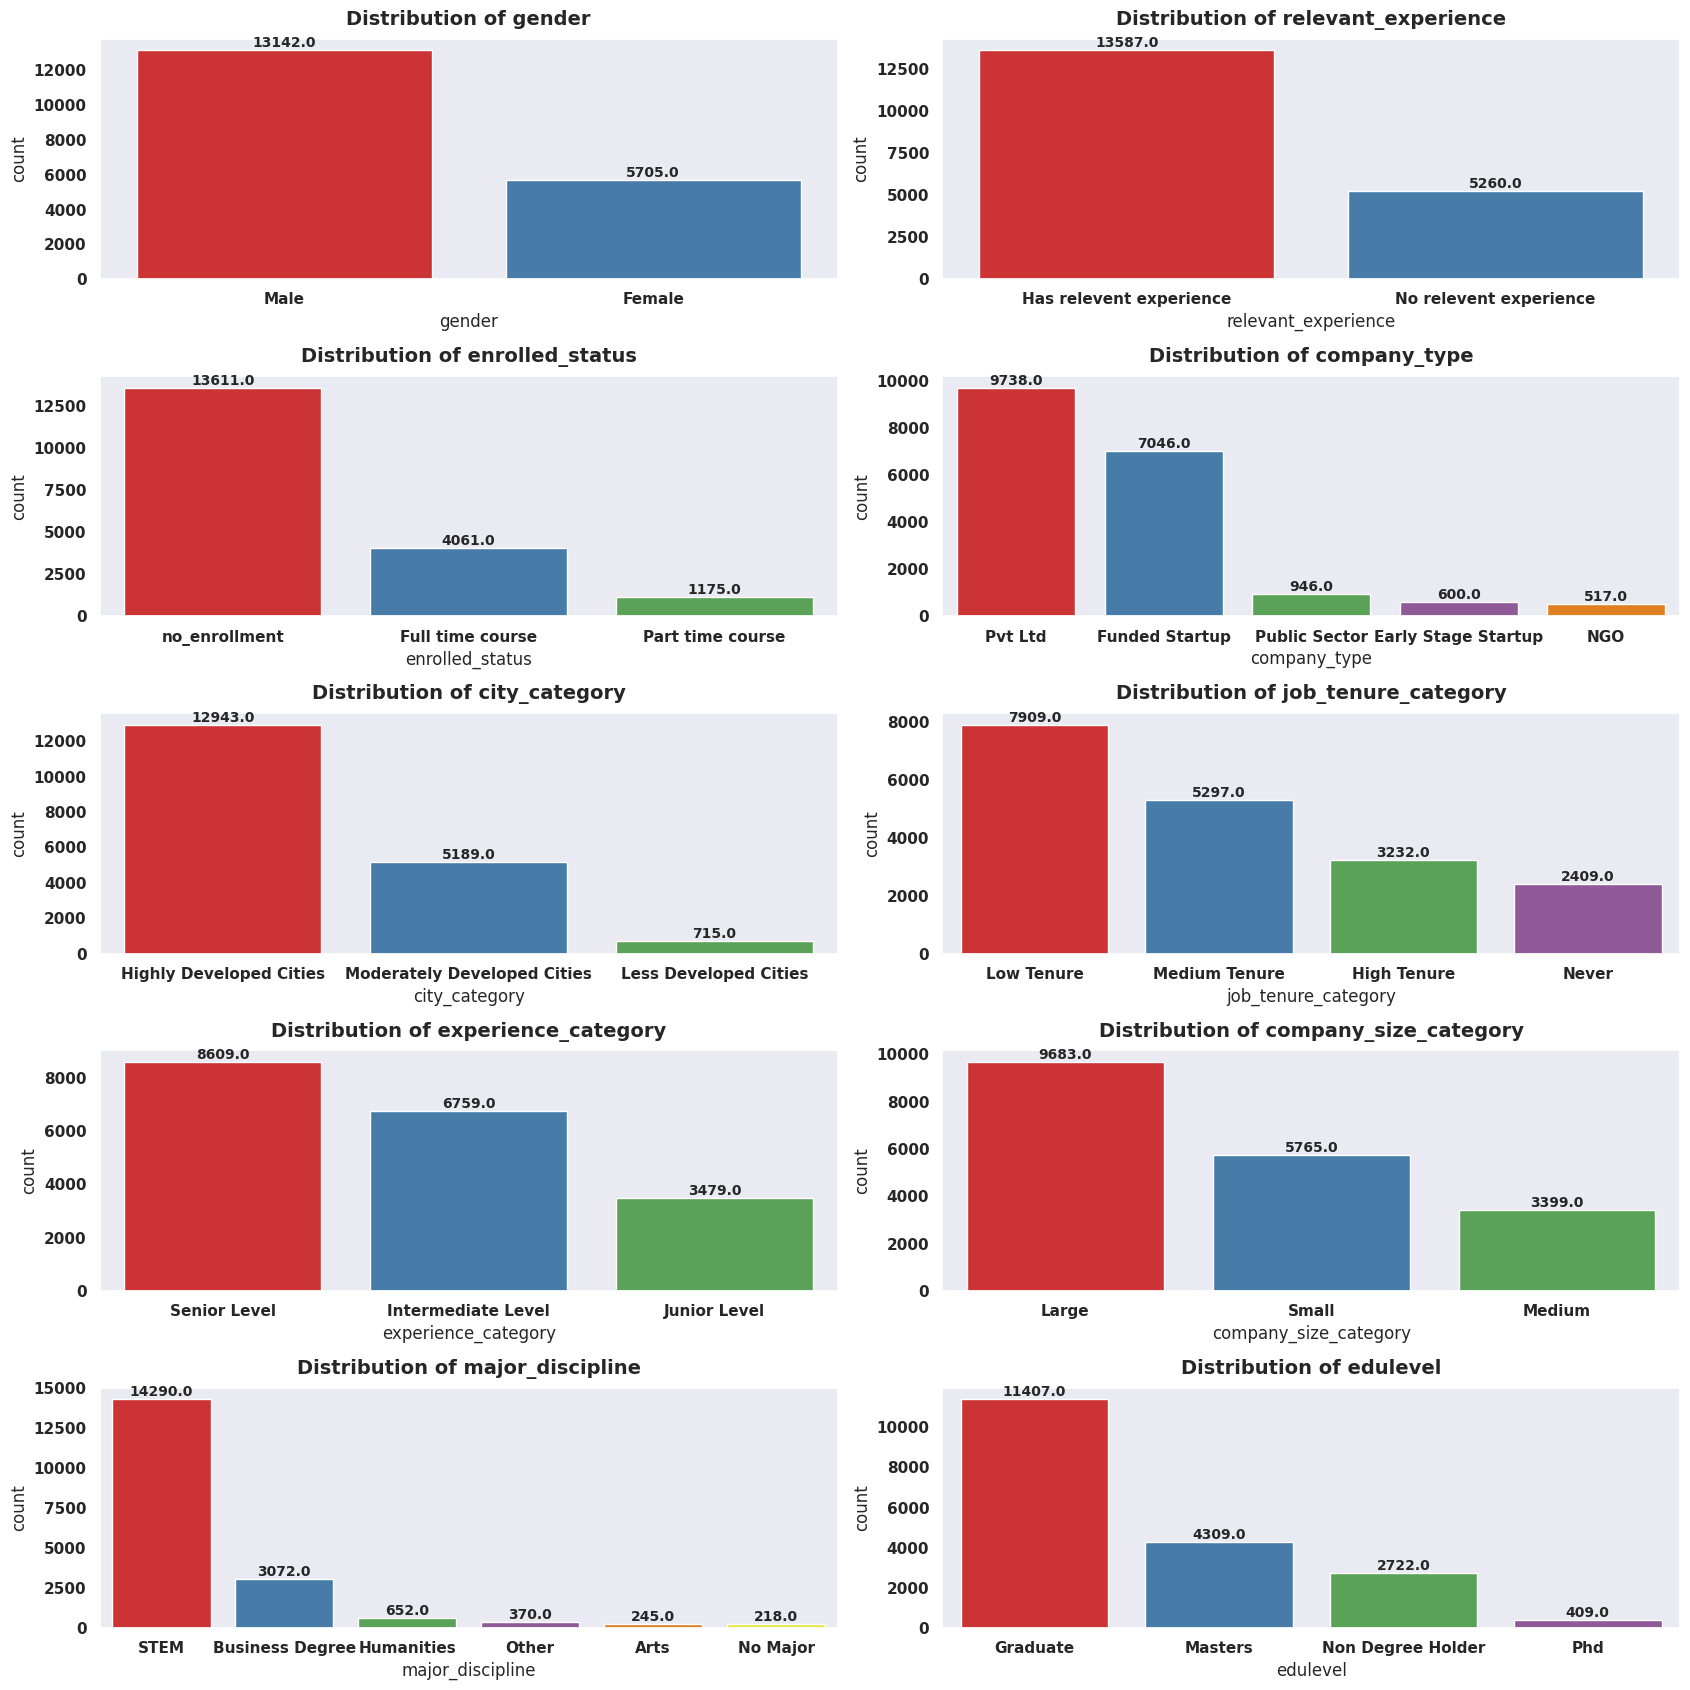

In [ ]:
# Plot for the rest of categorical features
fig, axes = plt.subplots(5, 2, figsize=(17, 17))
axes = axes.ravel()  # Flatten the axes array

cats_feature=['gender', 'relevant_experience', 'enrolled_status',
               'company_type', 'city_category', 'job_tenure_category',
               'experience_category', 'company_size_category', 'major_discipline', 'edulevel']

for i, feature in enumerate(cats_feature):
    sns.countplot(data=dfk, x=feature, order=dfk[feature].value_counts().index, palette='Set1', ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}', size=14, fontweight='bold', pad=10)
    axes[i].grid(False)
    total_count = len(dfk)
    for p in axes[i].patches:
        height = p.get_height()
        axes[i].annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom', size=10)

plt.tight_layout()
plt.show()

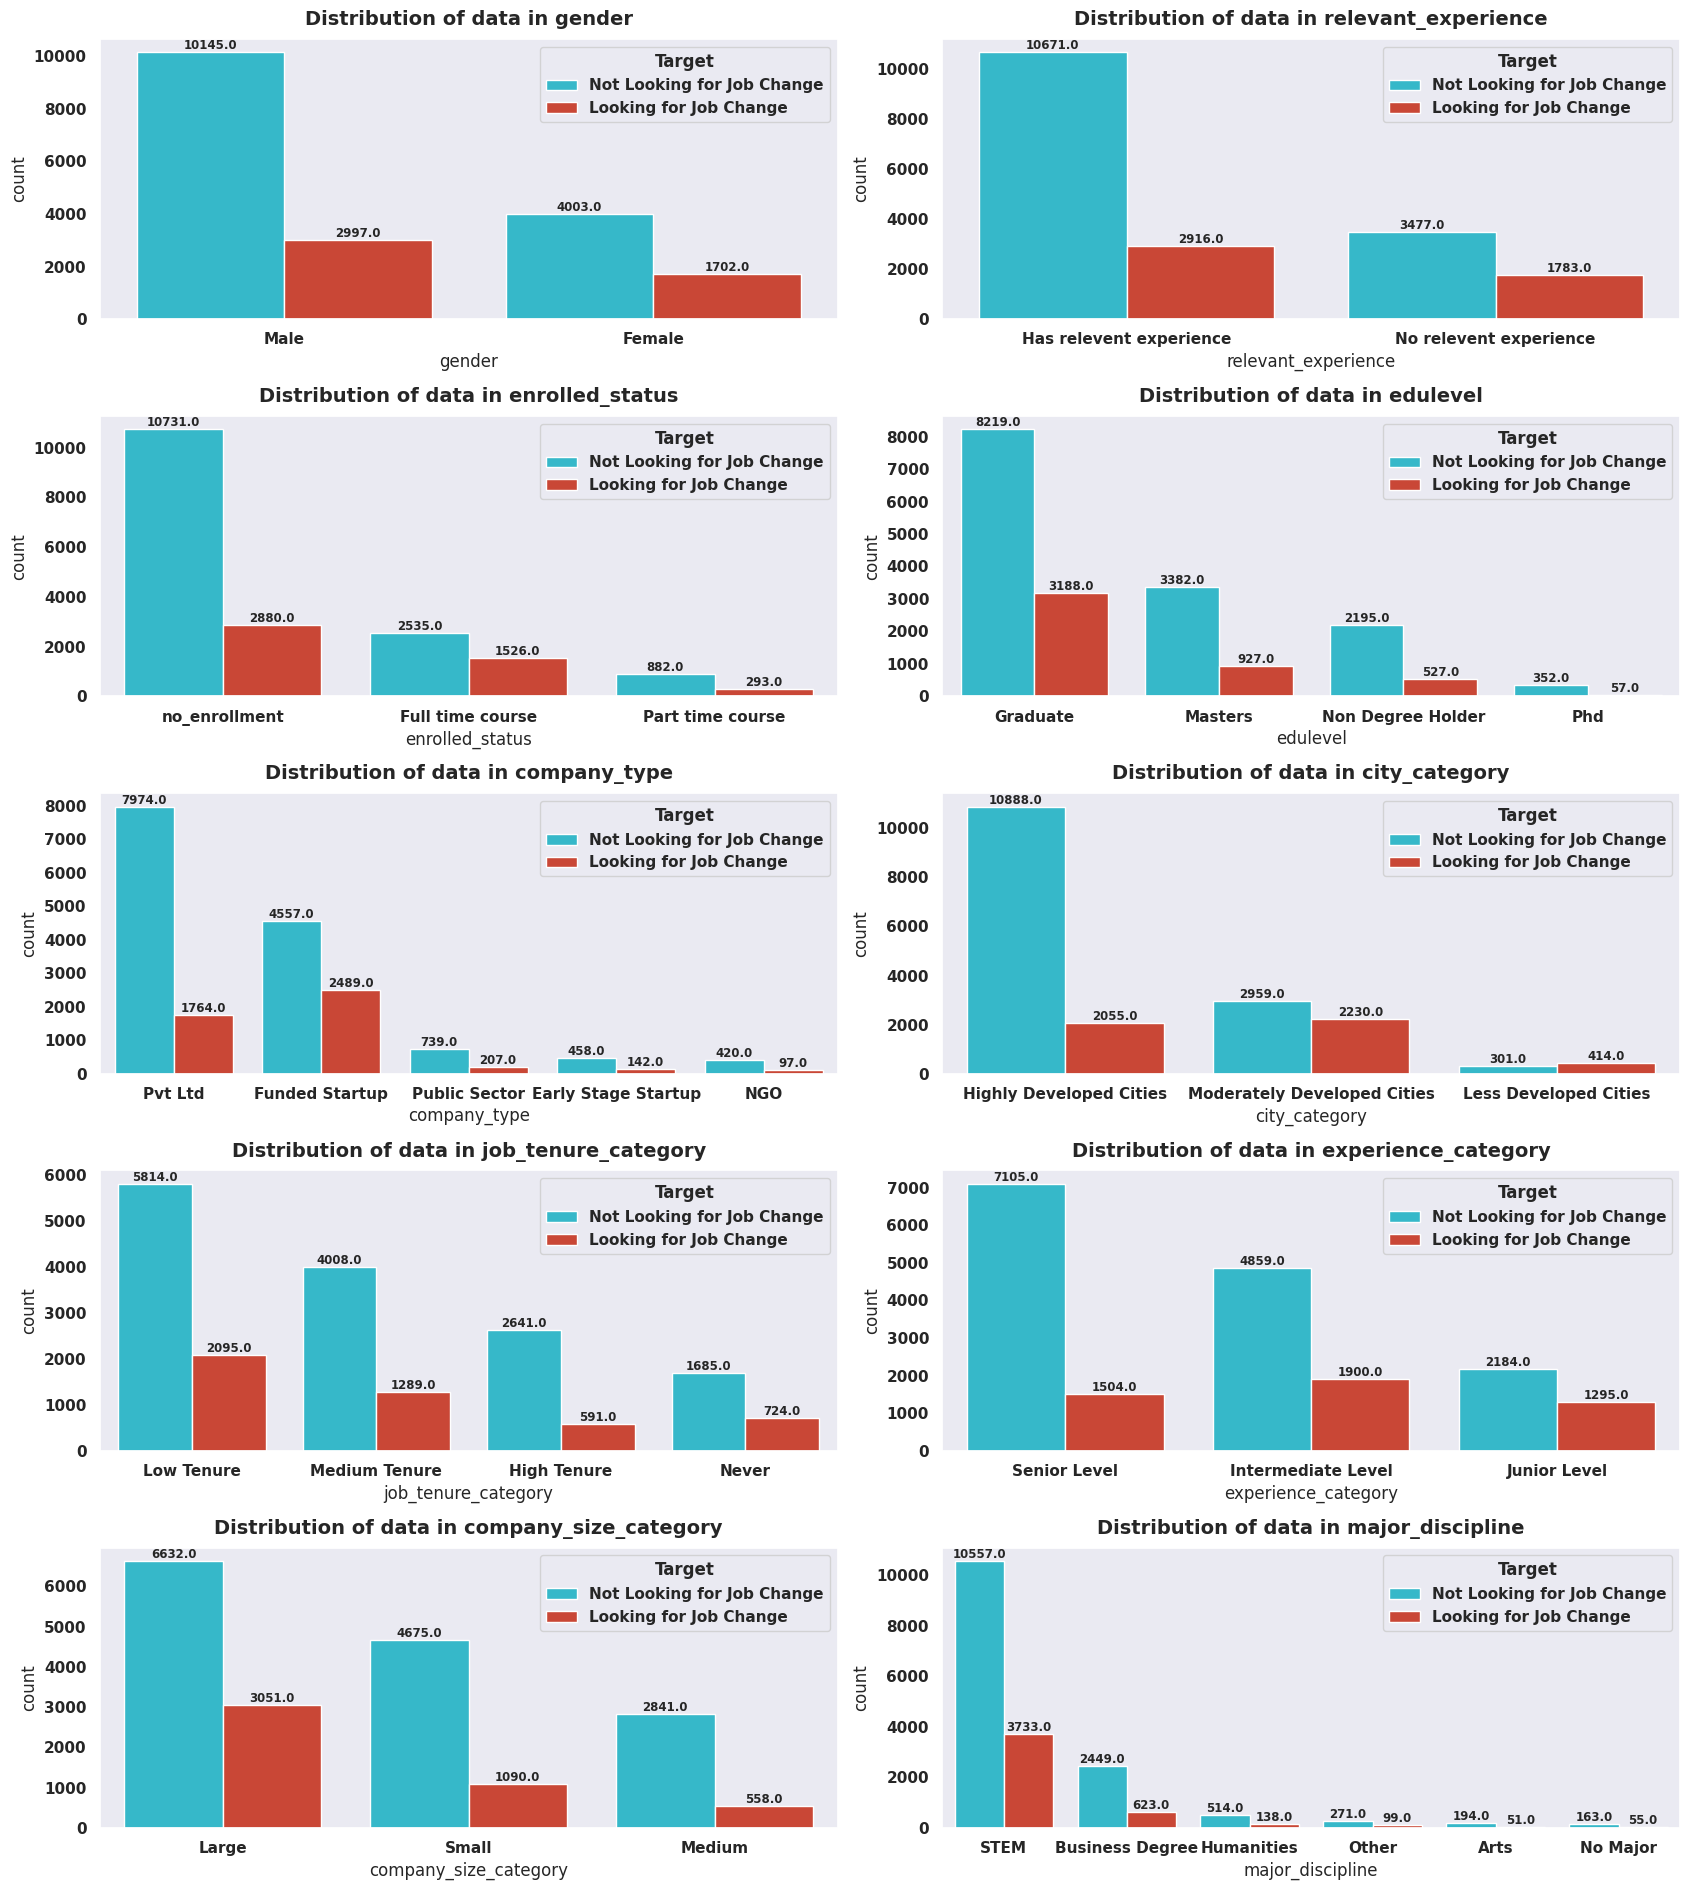

In [ ]:
# Define the palette for the hue
palette = {0: '#1ECBE1', 1: '#E1341E'}

fig, axes = plt.subplots(5, 2, figsize=(17, 19))
axes = axes.ravel()  # Flatten the axes array

cats_feature=['gender', 'relevant_experience', 'enrolled_status', 'edulevel',
               'company_type', 'city_category', 'job_tenure_category',
               'experience_category', 'company_size_category', 'major_discipline']

for i, feature in enumerate(cats_feature):
    countplot = sns.countplot(data=dfk, x=feature, order=dfk[feature].value_counts().index,hue='target', palette=palette, ax=axes[i])
    axes[i].set_title(f'Distribution of data in {feature}', size=14, pad=10, fontweight='bold')
    axes[i].grid(False)
    total_count = len(dfk)
    for p in axes[i].patches:
        height = p.get_height()
        axes[i].annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom', size=8.5)

    # Change the legend labels
    legend = countplot.get_legend()
    legend.set_title('Target')
    for t, l in zip(legend.texts, ('Not Looking for Job Change', 'Looking for Job Change')):
        t.set_text(l)

plt.tight_layout()
plt.show()

#### ***Analysis***

- ***Gender***

Male candidates have a greater tendency to leave the company after receiving training

- ***Relevant Experience***

Candidates who do not have relevant experience with data science tend to leave the company after receiving training

- ***Enrolled Status***

Candidates who have experience studying at a university with a full-time course type are more likely to leave the company after receiving training compared to other types of courses

- ***Edulevel***

Candidates who have completed school and graduated are more likely to leave the company after receiving training than other types of education

- ***Company Type***

Candidates who have experience working in Pvt Ltd type companies tend to leave the company after receiving training compared to other types of companies

- ***City category***

Candidates who live in areas with a less developed city index are more likely to leave the company after receiving training compared to other city categories

- ***Job Tenure Category***

Candidates who do not have a year difference between their previous job and their current job (candidates who immediately get a job without waiting) are more likely to leave the company after receiving training compared to other job tenure categories

- ***Experience level***

Candidates who have work experience equivalent to junior level positions are less likely to leave the company after receiving training than other experience level categories

- ***Major Discipline***

Candidates who have STEM disciplines are more likely to leave the company after receiving training compared to other experience level categories

- ***Company Size***

Candidates who work in companies with an 'unknown' size are more likely to leave the company after receiving training compared to other experience level categories

## Feature Engineering

### D. Feature Selection

Before selecting features, we look once again at the correlation between categorical features and targets using Chi Square

In [ ]:
categoric = dfk.select_dtypes('object')
# Create an empty DataFrame to store the chi-square results
chi_square_results = pd.DataFrame(columns=['Feature', 'Chi-Square', 'P-Value'])

# Calculate chi-square for each categorical feature
for feature in categoric :
    contingency_table = pd.crosstab(dfk[feature], dfk['target'])
    chi2, p, _, _ = chi2_contingency(contingency_table)


    # Create a temporary DataFrame and concatenate it to the results DataFrame
    temp_df = pd.DataFrame({'Feature' : [feature], 'Chi-Square' : [chi2], 'P-Value' : [p]})
    chi_square_results = pd.concat([chi_square_results, temp_df], ignore_index=True)


# Save the results to a CSV file
chi_square_results.to_csv('chi_square_results.csv', index=False)

# Print the chi square result Ordered by strongest Correlation
chi_squaresult = pd.read_csv('chi_square_results.csv')
chi_squaresult = chi_squaresult.sort_values(by=['P-Value'],ascending=True)

# adding correlation column in chi square result
chi_squaresult['Correlation'] = chi_squaresult['P-Value'].apply(lambda p: 'Significant' if p < 0.05 else 'Not Significant')
chi_squaresult.to_csv('chi_square_results.csv', index=False)
chi_square_resultsn = pd.read_csv('chi_square_results.csv')
chi_square_resultsn

,Feature,Chi-Square,P-Value,Correlation
0,city,2972.704055,0.000000e+00,Significant
1,city_category,1884.879347,0.000000e+00,Significant
2,target,18841.657394,0.000000e+00,Significant
3,company_size,777.194570,1.546367e-163,Significant
4,company_type,664.190273,1.974617e-142,Significant
5,experience,684.223516,2.852357e-131,Significant
6,experience_category,573.430275,3.028293e-125,Significant
7,company_size_category,467.277868,3.403300e-102,Significant
8,enrolled_status,450.443553,1.539661e-98,Significant
9,relevant_experience,312.655710,5.763734e-70,Significant


In [ ]:
dfk.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevant_experience', 'enrolled_status', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_job_tenure', 'training_hours', 'target', 'city_category',
       'job_tenure_category', 'experience_category', 'company_size_category',
       'edulevel'],
      dtype='object')

In [ ]:
dfc = dfk[[
      #  'enrollee_id', 'city', 'city_development_index','gender',
      'relevant_experience', 'enrolled_status',
      # 'education_level', 'major_discipline',
      #  'experience', 'company_size',
      'company_type',
      # 'last_job_tenure', 'training_hours',
      'target', 'city_category','job_tenure_category',
      'experience_category', 'company_size_category',
       'edulevel'
       ]].copy()

In [ ]:
dfc.sample(3)

,relevant_experience,enrolled_status,company_type,target,city_category,job_tenure_category,experience_category,company_size_category,edulevel
13623,No relevent experience,Full time course,Funded Startup,1,Less Developed Cities,Low Tenure,Junior Level,Large,Graduate
1400,Has relevent experience,no_enrollment,Public Sector,1,Highly Developed Cities,Medium Tenure,Intermediate Level,Large,Phd
5932,Has relevent experience,Full time course,Public Sector,0,Moderately Developed Cities,Low Tenure,Junior Level,Large,Non Degree Holder


### F. Feature engineering - Feature Encoding


In [ ]:
# Print all the feature value counts to Encode the feature Easier
for col in dfc:
    print(f'''Value Count column {col}:''')
    print(dfc[col].value_counts())
    print()

Value Count column relevant_experience:
Has relevent experience    13587
No relevent experience      5260
Name: relevant_experience, dtype: int64

Value Count column enrolled_status:
no_enrollment       13611
Full time course     4061
Part time course     1175
Name: enrolled_status, dtype: int64

Value Count column company_type:
Pvt Ltd                9738
Funded Startup         7046
Public Sector           946
Early Stage Startup     600
NGO                     517
Name: company_type, dtype: int64

Value Count column target:
0    14148
1     4699
Name: target, dtype: int64

Value Count column city_category:
Highly Developed Cities        12943
Moderately Developed Cities     5189
Less Developed Cities            715
Name: city_category, dtype: int64

Value Count column job_tenure_category:
Low Tenure       7909
Medium Tenure    5297
High Tenure      3232
Never            2409
Name: job_tenure_category, dtype: int64

Value Count column experience_category:
Senior Level          8609
In

#### Label Encoding

Label Encode all features to numeric values for modelling steps



In [ ]:
# encoded relevant_experience
map_rx = {'Has relevent experience' : 0,
          'No relevent experience' : 1}
dfc['relevant_experience'] = dfc['relevant_experience'].map(map_rx)

# encoded enrolled Status
map_en = {'no_enrollment' : 0,
          'Full time course' : 1,
          'Part time course' : 2}
dfc['enrolled_status'] = dfc['enrolled_status'].map(map_en)

#encoded feature education_level
mapping_edu = {'Graduate' : 1,
               'Masters' : 2,
               'Non Degree Holder' : 0,
               'Phd' : 3
               }
dfc['edulevel'] = dfc['edulevel'].map(mapping_edu)

#encoded feature city_category
mapping_city_cat = {'Highly Developed Cities':2,
                    'Moderately Developed Cities':1,
                    'Less Developed Cities':0
                    }
dfc['city_category'] = dfc['city_category'].map(mapping_city_cat)

# encoded feature company_size_category
mapping_csize = {'Large':2,
                 'Small':0,
                 'Medium':1
                 }
dfc['company_size_category'] = dfc['company_size_category'].map(mapping_csize)

# encoded feature job_tenure_category
mapping_new_job = {'Low Tenure' : 1,
                   'Medium Tenure' : 2,
                   'High Tenure' : 3,
                   'Never' : 0}
dfc['job_tenure_category'] = dfc['job_tenure_category'].map(mapping_new_job)

# encode company type based on their funding
mapping_company = {'Pvt Ltd' : 0,
                   'Funded Startup' : 1,
                   'Public Sector' : 2,
                   'Early Stage Startup' : 3,
                   'NGO' : 4,
                   'Other' : 5}
dfc['company_type'] = dfc['company_type'].map(mapping_company)

# encoed feature experience_category
map_ex = {'Senior Level' : 2,
          'Intermediate Level' : 1,
          'Junior Level' : 0}
dfc['experience_category'] = dfc['experience_category'].map(map_ex)

for col in dfc.columns:
    value_counts = dfc[col].value_counts()
    print(f"Value Counts for {col}:\n{value_counts}\n")

Value Counts for relevant_experience:
0    13587
1     5260
Name: relevant_experience, dtype: int64

Value Counts for enrolled_status:
0    13611
1     4061
2     1175
Name: enrolled_status, dtype: int64

Value Counts for company_type:
0    9738
1    7046
2     946
3     600
4     517
Name: company_type, dtype: int64

Value Counts for target:
0    14148
1     4699
Name: target, dtype: int64

Value Counts for city_category:
2    12943
1     5189
0      715
Name: city_category, dtype: int64

Value Counts for job_tenure_category:
1    7909
2    5297
3    3232
0    2409
Name: job_tenure_category, dtype: int64

Value Counts for experience_category:
2    8609
1    6759
0    3479
Name: experience_category, dtype: int64

Value Counts for company_size_category:
2    9683
0    5765
1    3399
Name: company_size_category, dtype: int64

Value Counts for edulevel:
1    11407
2     4309
0     2722
3      409
Name: edulevel, dtype: int64



In [ ]:
dfc.sample(3)

,relevant_experience,enrolled_status,company_type,target,city_category,job_tenure_category,experience_category,company_size_category,edulevel
13432,0,0,0,0,2,3,2,1,2
15049,0,0,1,0,2,2,1,0,2
14176,0,0,1,0,2,3,2,2,2


### G. Handling Imbalanced Data

Since the dataset is imbalanced, therefore the SMOTE method is applied so that the data is balanced

#### SMOTE Over Sampling

In [ ]:
# define x and y
x = dfc.drop(columns='target')
y = dfc['target'].astype(int)

#split x y train and x y test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=17)

# Initialize SMOTE
smote = SMOTE(random_state=17)

# Doing oversampling to Data Train
x_over, y_over = smote.fit_resample(x_train, y_train)

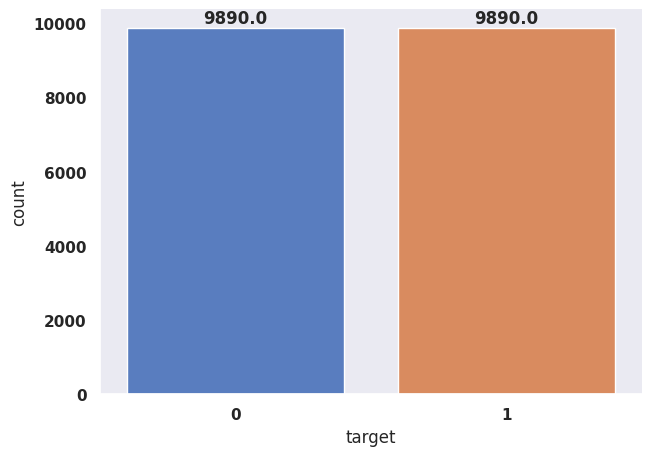

In [ ]:
# Set a custom color palette for the countplot
bright_palette = sns.color_palette("muted")

# Create the countplot with the custom color palette
plt.figure(figsize=(7, 5))
ax = sns.countplot(x=y_over, data=x_over, palette=bright_palette)
sns.despine()

# Add annotations to the bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', size=12)

plt.grid(False)
plt.show()

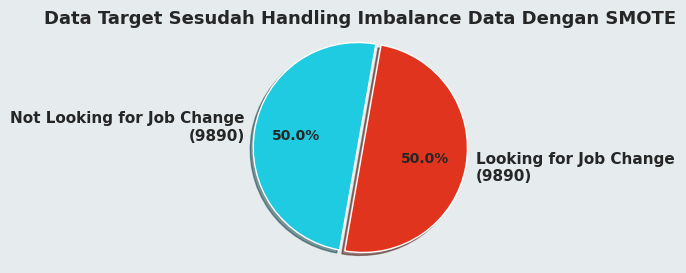

In [ ]:
target_counts = y_over.value_counts()

# Create a pie chart
fig, ax = plt.subplots(figsize=(6, 3))
fig.patch.set_facecolor('#e6ebed')

plt.rcParams['font.size'] = 10
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.weight'] = 'bold'

wedges, texts, autotexts = ax.pie(target_counts,
                                   explode=(0.05, 0),
                                   labels=['Not Looking for Job Change', 'Looking for Job Change'],
                                   colors=['#1ECBE1', '#E1341E'],
                                   autopct='%1.1f%%',
                                   shadow=True,
                                   startangle=80)

plt.axis('equal')

# Display the total count of each category as text
for i, text in enumerate(texts):
    text.set(text=texts[i].get_text() + f'\n({target_counts.iloc[i]})')

plt.title('Data Target Sesudah Handling Imbalance Data Dengan SMOTE', fontsize=13, fontweight='bold')

plt.show()

# Stage 3 Modelling

In [ ]:
x_train = x_over
y_train = y_over

In [ ]:
def eval_classification(model) :
  y_pred = model.predict(x_test)
  y_pred_train = model.predict(x_train)
  y_pred_proba = model.predict_proba(x_test)
  y_pred_proba_train = model.predict_proba(x_train)

  print('Confusion matrix data train: ')
  print(confusion_matrix(y_train, y_pred_train))
  print('          ')
  print('Confusion matrix data test: ')
  print(confusion_matrix(y_test, y_pred))
  print('          ')

  print('Accuracy (Train Set): %.2f' % accuracy_score(y_train, y_pred_train))
  print('Accuracy (Test Set): %.2f' % accuracy_score(y_test, y_pred))
  print('Precision (Train Set): %.2f' % precision_score(y_train, y_pred_train))
  print('Precision (Test Set): %.2f' % precision_score(y_test, y_pred))
  print('Recall (Train Set): %.2f' % recall_score(y_train, y_pred_train))
  print('Recall (Test Set): %.2f' % recall_score(y_test, y_pred))
  print('F1-Score (Train Set): %.2f' % f1_score(y_train, y_pred_train))
  print('F1-Score (Test Set): %.2f' % f1_score(y_test, y_pred))

  print('AUC (train-proba): %.2f' % roc_auc_score(y_train, y_pred_proba_train[:, 1]))
  print('AUC (test-proba): %.2f' % roc_auc_score(y_test, y_pred_proba[:, 1]))

  score = cross_validate(model, x, y, cv=5, scoring='roc_auc', return_train_score=True)
  print('ROC-AUC (crossval train):' + str(score['train_score']))
  print('ROC-AUC (crossval train):' + str(score['train_score'].mean()))
  print('ROC-AUC (crossval test):' + str(score['test_score']))
  print('ROC-AUC (crossval test):' + str(score['test_score'].mean()))

In [ ]:
def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=x.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

## Fit Model

### Decision Tree

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
eval_classification(dt)

Confusion matrix data train: 
[[7490 2400]
 [1749 8141]]
          
Confusion matrix data test: 
[[3047 1211]
 [ 480  917]]
          
Accuracy (Train Set): 0.79
Accuracy (Test Set): 0.70
Precision (Train Set): 0.77
Precision (Test Set): 0.43
Recall (Train Set): 0.82
Recall (Test Set): 0.66
F1-Score (Train Set): 0.80
F1-Score (Test Set): 0.52
AUC (train-proba): 0.87
AUC (test-proba): 0.70
ROC-AUC (crossval train):[0.8631576  0.86343746 0.86410658 0.86317653 0.86209052]
ROC-AUC (crossval train):0.8631937411693247
ROC-AUC (crossval test):[0.71995696 0.71215905 0.70995484 0.72164305 0.72188555]
ROC-AUC (crossval test):0.7171198885886086


### Random Forest

In [ ]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
eval_classification(rf)

Confusion matrix data train: 
[[7374 2516]
 [1634 8256]]
          
Confusion matrix data test: 
[[3020 1238]
 [ 460  937]]
          
Accuracy (Train Set): 0.79
Accuracy (Test Set): 0.70
Precision (Train Set): 0.77
Precision (Test Set): 0.43
Recall (Train Set): 0.83
Recall (Test Set): 0.67
F1-Score (Train Set): 0.80
F1-Score (Test Set): 0.52
AUC (train-proba): 0.87
AUC (test-proba): 0.73
ROC-AUC (crossval train):[0.85842673 0.85852396 0.85935272 0.8581352  0.85722678]
ROC-AUC (crossval train):0.8583330776952682
ROC-AUC (crossval test):[0.74923408 0.74602831 0.73762833 0.75685059 0.7493614 ]
ROC-AUC (crossval test):0.7478205400299623


### AdaBoost

In [ ]:
ab = AdaBoostClassifier()
ab.fit(x_train, y_train)
eval_classification(ab)

Confusion matrix data train: 
[[7204 2686]
 [2950 6940]]
          
Confusion matrix data test: 
[[3096 1162]
 [ 401  996]]
          
Accuracy (Train Set): 0.72
Accuracy (Test Set): 0.72
Precision (Train Set): 0.72
Precision (Test Set): 0.46
Recall (Train Set): 0.70
Recall (Test Set): 0.71
F1-Score (Train Set): 0.71
F1-Score (Test Set): 0.56
AUC (train-proba): 0.76
AUC (test-proba): 0.77
ROC-AUC (crossval train):[0.76632343 0.76396882 0.76894163 0.766204   0.76441108]
ROC-AUC (crossval train):0.7659697930500128
ROC-AUC (crossval test):[0.76366382 0.77180193 0.7517298  0.76338098 0.76918005]
ROC-AUC (crossval test):0.7639513182233255


### XGBoost

In [ ]:
xgb = XGBClassifier(random_state=17)
xgb.fit(x_train, y_train)
eval_classification(xgb)

Confusion matrix data train: 
[[7275 2615]
 [1888 8002]]
          
Confusion matrix data test: 
[[3035 1223]
 [ 396 1001]]
          
Accuracy (Train Set): 0.77
Accuracy (Test Set): 0.71
Precision (Train Set): 0.75
Precision (Test Set): 0.45
Recall (Train Set): 0.81
Recall (Test Set): 0.72
F1-Score (Train Set): 0.78
F1-Score (Test Set): 0.55
AUC (train-proba): 0.84
AUC (test-proba): 0.76
ROC-AUC (crossval train):[0.82964517 0.830644   0.83273721 0.83098096 0.82926055]
ROC-AUC (crossval train):0.8306535776116324
ROC-AUC (crossval test):[0.76452334 0.76425663 0.74979355 0.76928187 0.76834803]
ROC-AUC (crossval test):0.7632406853480517


### GradientBoosting

In [ ]:
gb = GradientBoostingClassifier(random_state=17)
gb.fit(x_train, y_train)
eval_classification(gb)

Confusion matrix data train: 
[[6746 3144]
 [2023 7867]]
          
Confusion matrix data test: 
[[2896 1362]
 [ 289 1108]]
          
Accuracy (Train Set): 0.74
Accuracy (Test Set): 0.71
Precision (Train Set): 0.71
Precision (Test Set): 0.45
Recall (Train Set): 0.80
Recall (Test Set): 0.79
F1-Score (Train Set): 0.75
F1-Score (Test Set): 0.57
AUC (train-proba): 0.79
AUC (test-proba): 0.78
ROC-AUC (crossval train):[0.78502209 0.78468281 0.78805256 0.78568715 0.78503553]
ROC-AUC (crossval train):0.7856960284432443
ROC-AUC (crossval test):[0.77662582 0.78263796 0.76642844 0.77766333 0.78199235]
ROC-AUC (crossval test):0.7770695800773946


#### Model Analysis

from 3 types of model that have been run, namely decision tree, random forest, XGBoost and gradient boosting,
the best performance is Gradient Boosting. Therefore Gradient Model Boosting will be performed
hyperparameter tuning is carried out

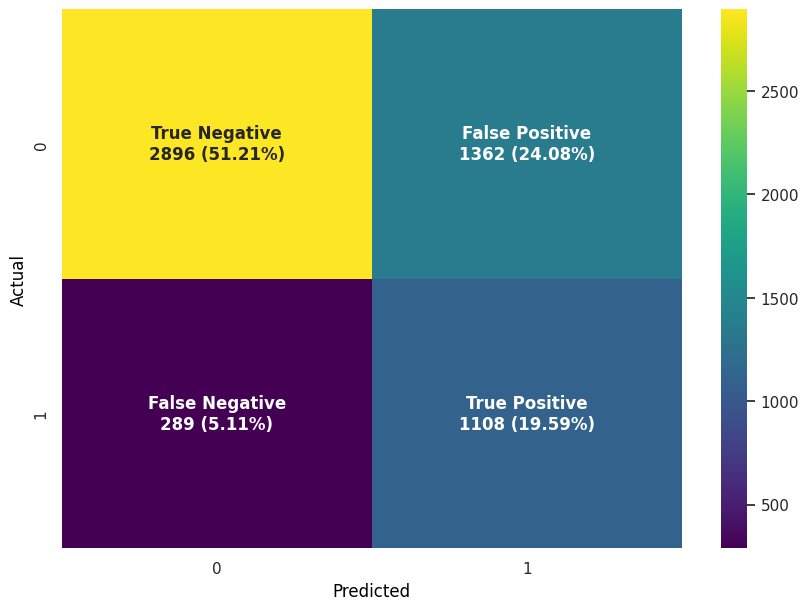

In [ ]:
# Assuming X_test is your test dataset and model is your Gradient Boosting model
y_pred = gb.predict(x_test)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)

# Calculate the percentage of each category
percentage_matrix = cnf_matrix / cnf_matrix.sum()

# Define the labels
labels = np.array([['True Negative', 'False Positive'],
                   ['False Negative', 'True Positive']])

# Create labels with both count and percentage
new_labels = (np.asarray(["{0}\n{1} ({2:.2%})".format(label, value, percentage)
                          for label, value, percentage in zip(labels.flatten(), cnf_matrix.flatten(), percentage_matrix.flatten())])
             ).reshape(2,2)

# Plot confusion matrix using a heatmap
fig = plt.figure(figsize=(10,7))
fig.patch.set_facecolor('white')  # Change figure color

sns.heatmap(cnf_matrix, annot=new_labels, fmt='', cmap='viridis', annot_kws={"weight": "bold"})  # Change heatmap color to 'viridis'
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Change label colors
plt.gca().xaxis.label.set_color('black')
plt.gca().yaxis.label.set_color('black')

plt.show()

## Hyperparameter tuning Gradient Boosting

in this processing, we would like to run 2 type of hyperparameter tuning to elevate performance
of machine learning :
1. Hyperparameter tuning with ***RandomizedSearchCV***
2. Manual Hyperparameter tuning through ***learning rate***, ***n_estimators***, ***max_depth*** & ***max leaf of nodes***

#### RandomizedSearchCV

In [ ]:
# List of hyperparameters
learning_rate = [float(x) for x in np.linspace(0.01, 0.04, 50)]
n_estimators = [int(x) for x in np.linspace(1, 100, 50)]
min_samples_split = [int(x) for x in np.linspace(2, 10, 10)]
min_samples_leaf = [int(x) for x in np.linspace(1, 10, 10)]
max_depth = [int(x) for x in np.linspace(1, 10, 10)]
max_leaf_nodes = [int(x) for x in np.linspace(1,10,10)]
n_iter_no_change = [int(x) for x in np.linspace(1,10,10)]

hyperparameters = dict(learning_rate=learning_rate, n_estimators=n_estimators,
                       min_samples_leaf=min_samples_leaf,min_samples_split=min_samples_split,
                       max_depth=max_depth,max_leaf_nodes=max_leaf_nodes, n_iter_no_change=n_iter_no_change)

# Crossvalidate with GridSearch
gb = GradientBoostingClassifier()
stratified_kfold = StratifiedKFold(n_splits = 5, shuffle=True, random_state=17)
gb_tune = RandomizedSearchCV(gb, hyperparameters, scoring='recall', cv=stratified_kfold)
gb_tune.fit(x_train, y_train)
eval_classification(gb_tune)

Confusion matrix data train: 
[[5714 4176]
 [1573 8317]]
          
Confusion matrix data test: 
[[2436 1822]
 [ 203 1194]]
          
Accuracy (Train Set): 0.71
Accuracy (Test Set): 0.64
Precision (Train Set): 0.67
Precision (Test Set): 0.40
Recall (Train Set): 0.84
Recall (Test Set): 0.85
F1-Score (Train Set): 0.74
F1-Score (Test Set): 0.54
AUC (train-proba): 0.74
AUC (test-proba): 0.76
ROC-AUC (crossval train):[0.78361926 0.7803377  0.78033147 0.75792647 0.76837779]
ROC-AUC (crossval train):0.7741185386140378
ROC-AUC (crossval test):[0.77732407 0.78321705 0.76730256 0.75541109 0.76655434]
ROC-AUC (crossval test):0.7699618223897433


#### Manual hyperparameter Tuing

#### Learning Curve

#### learning rate

param value: 0.01; train : 0.7611550258096902; test : 0.7670054229471798
param value: 0.011052631578947368; train : 0.7615675872412513; test : 0.7673924160777994
param value: 0.012105263157894737; train : 0.7612775617740547; test : 0.7668872404229287
param value: 0.013157894736842105; train : 0.7612922787671464; test : 0.7669299407944219
param value: 0.014210526315789472; train : 0.7638311875524605; test : 0.7691067351262334
param value: 0.015263157894736841; train : 0.7649797366583478; test : 0.7705951961073398
param value: 0.016315789473684207; train : 0.7651724837724576; test : 0.7709073795319972
param value: 0.017368421052631578; train : 0.7667517362371321; test : 0.7725617667598118
param value: 0.018421052631578946; train : 0.7675117342332901; test : 0.7737116507795507
param value: 0.019473684210526313; train : 0.7681467425809281; test : 0.7741942154109338
param value: 0.020526315789473684; train : 0.7685771136699856; test : 0.7751924626783624
param value: 0.02157894736842105; tra

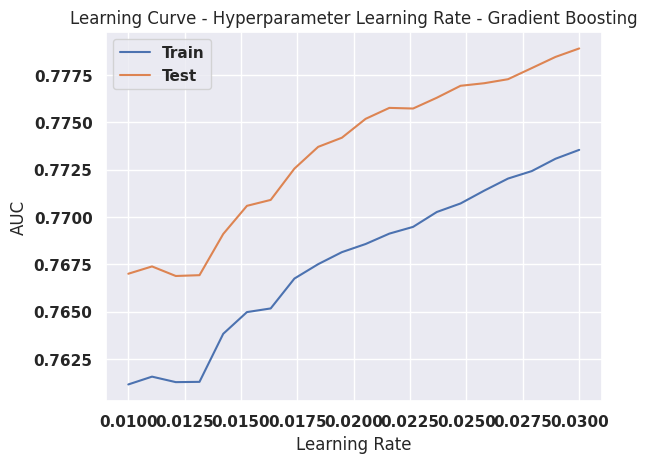

In [ ]:
def draw_learning_curve(param_values):
  train_scores = []
  test_scores = []

 for lr in param_values:
    gbc = GradientBoostingClassifier(learning_rate=lr)
    gbc.fit(x_train, y_train)

    # eval on train
    y_pred_train_proba = gbc.predict_proba(x_train)
    train_auc = roc_auc_score(y_train, y_pred_train_proba[:,1])
    train_scores.append(train_auc)

    # eval on test
    y_pred_proba = gbc.predict_proba(x_test)
    test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
    test_scores.append(test_auc)

    print('param value: ' + str(lr) + '; train : ' + str(train_auc) + '; test : ' + str(test_auc))

  plt.plot(param_values, train_scores, label='Train')
  plt.plot(param_values, test_scores, label = 'Test')
  plt.xlabel('Learning Rate')
  plt.ylabel('AUC')
  plt.title('Learning Curve - Hyperparameter Learning Rate - Gradient Boosting')
  plt.legend()
  plt.show()

param_values = [float(x) for x in np.linspace(0.01, 0.03, 20)]
draw_learning_curve(param_values)

#### n_estimators

param value: 1; train : 0.7461363369153715; test : 0.7506494995482837
param value: 3; train : 0.7469801180017606; test : 0.7500599318206194
param value: 5; train : 0.7502901532632466; test : 0.7550796630907067
param value: 7; train : 0.750503225061112; test : 0.7553335117558831
param value: 9; train : 0.7508381427246731; test : 0.7552457574491135
param value: 11; train : 0.7506671720574448; test : 0.7555604625492526
param value: 13; train : 0.7506252702886452; test : 0.7557627009228997
param value: 15; train : 0.7507962409558735; test : 0.7554479958227606
param value: 17; train : 0.7521775731223437; test : 0.7576711889834387
param value: 19; train : 0.7523512019474072; test : 0.7573823730849135
param value: 21; train : 0.7525408512852703; test : 0.7574834082158878
param value: 23; train : 0.7526875560385677; test : 0.757627563997602
param value: 25; train : 0.7526854704070354; test : 0.7576041964714699
param value: 27; train : 0.7526891100385329; test : 0.7576132745032047
param value: 

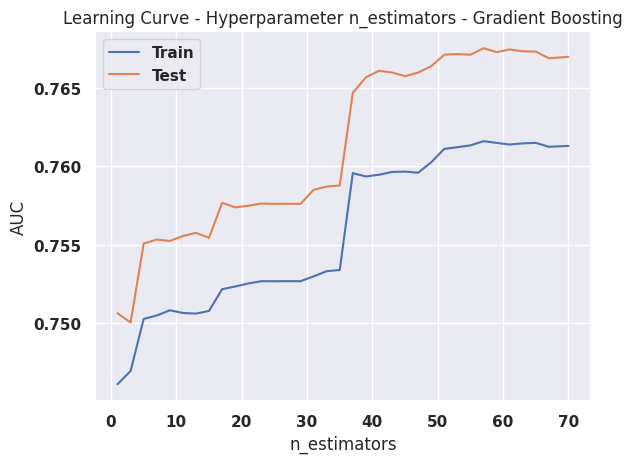

In [ ]:
def draw_learning_curve(param_values):
  train_scores = []
  test_scores = []

  for es in param_values:
    gbc = GradientBoostingClassifier(learning_rate = 0.018571428571428572, n_estimators=es)
    gbc.fit(x_train, y_train)

    # eval on train
    y_pred_train_proba = gbc.predict_proba(x_train)
    train_auc = roc_auc_score(y_train, y_pred_train_proba[:,1])
    train_scores.append(train_auc)

    # eval on test
    y_pred_proba = gbc.predict_proba(x_test)
    test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
    test_scores.append(test_auc)

    print('param value: ' + str(es) + '; train : ' + str(train_auc) + '; test : ' + str(test_auc))

  plt.plot(param_values, train_scores, label='Train')
  plt.plot(param_values, test_scores, label = 'Test')
  plt.xlabel('n_estimators')
  plt.ylabel('AUC')
  plt.title('Learning Curve - Hyperparameter n_estimators - Gradient Boosting')
  plt.legend()
  plt.show()

param_values = [int(x) for x in np.linspace(1, 70, 35)]
draw_learning_curve(param_values)

#### max_depth

param value: 1; train : 0.7357437270031009; test : 0.7491651573037977
param value: 1; train : 0.7357437270031009; test : 0.7491651573037977
param value: 2; train : 0.7426678601113768; test : 0.7554656475511337
param value: 2; train : 0.7426678601113768; test : 0.7554656475511337
param value: 3; train : 0.7602101529360886; test : 0.7662741370574334
param value: 4; train : 0.7703423809528678; test : 0.7711867811753899
param value: 4; train : 0.7703423809528678; test : 0.7711867811753899
param value: 5; train : 0.7847966202545493; test : 0.778567977478412
param value: 6; train : 0.7973468108751371; test : 0.7812050616415166
param value: 6; train : 0.7973468108751371; test : 0.7812050616415166
param value: 7; train : 0.8071609238529794; test : 0.7766992478346373
param value: 8; train : 0.8165850186224404; test : 0.7689355133610134
param value: 8; train : 0.8165848550434969; test : 0.7692332391795745
param value: 9; train : 0.8304338982600312; test : 0.762906943786474
param value: 10; train

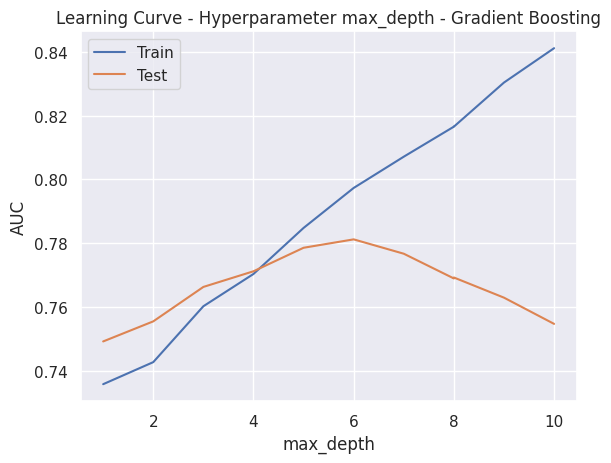

In [ ]:
def draw_learning_curve(param_values):
  train_scores = []
  test_scores = []

  for md in param_values:
    gbc = GradientBoostingClassifier(learning_rate = 0.018571428571428572, n_estimators=50,
                                     max_depth=md)
    gbc.fit(x_train, y_train)

    # eval on train
    y_pred_train_proba = gbc.predict_proba(x_train)
    train_auc = roc_auc_score(y_train, y_pred_train_proba[:,1])
    train_scores.append(train_auc)

    # eval on test
    y_pred_proba = gbc.predict_proba(x_test)
    test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
    test_scores.append(test_auc)

    print('param value: ' + str(md) + '; train : ' + str(train_auc) + '; test : ' + str(test_auc))

  plt.plot(param_values, train_scores, label='Train')
  plt.plot(param_values, test_scores, label = 'Test')
  plt.xlabel('max_depth')
  plt.ylabel('AUC')
  plt.title('Learning Curve - Hyperparameter max_depth - Gradient Boosting')
  plt.legend()
  plt.show()

param_values = [int(x) for x in np.linspace(1, 10, 15)]
draw_learning_curve(param_values)

#### max_leaf_nodes

param value: 2; train : 0.7357437270031009; test : 0.7491651573037977
param value: 2; train : 0.7357437270031009; test : 0.7491651573037977
param value: 3; train : 0.729980927717532; test : 0.7415426366571594
param value: 4; train : 0.7351169487210683; test : 0.7466551655849799
param value: 5; train : 0.7468761073527712; test : 0.7554823746651635
param value: 6; train : 0.7586293158003969; test : 0.7654185325664301
param value: 7; train : 0.7620001615342068; test : 0.7659859936057034
param value: 8; train : 0.7641794317880917; test : 0.7681730427511412
param value: 9; train : 0.7659976679776836; test : 0.7693700821023914
param value: 10; train : 0.7668461263994945; test : 0.768924165821345


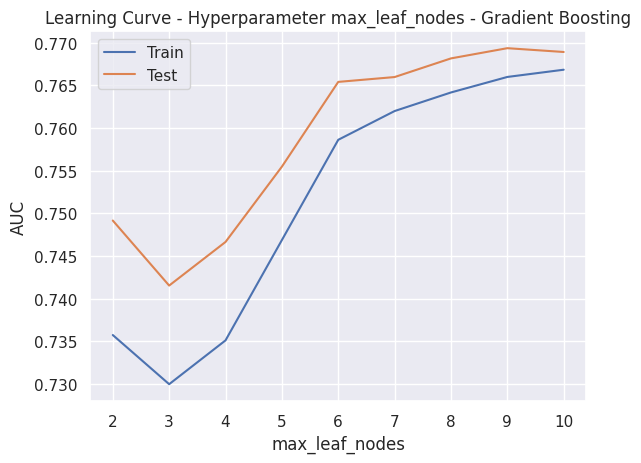

In [ ]:
def draw_learning_curve(param_values):
  train_scores = []
  test_scores = []

  for md in param_values:
    gbc = GradientBoostingClassifier(learning_rate = 0.018571428571428572, n_estimators=50,
                                     max_depth=4, max_leaf_nodes=md)
    gbc.fit(x_train, y_train)

    # eval on train
    y_pred_train_proba = gbc.predict_proba(x_train)
    train_auc = roc_auc_score(y_train, y_pred_train_proba[:,1])
    train_scores.append(train_auc)

    # eval on test
    y_pred_proba = gbc.predict_proba(x_test)
    test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
    test_scores.append(test_auc)

    print('param value: ' + str(md) + '; train : ' + str(train_auc) + '; test : ' + str(test_auc))

  plt.plot(param_values, train_scores, label='Train')
  plt.plot(param_values, test_scores, label = 'Test')
  plt.xlabel('max_leaf_nodes')
  plt.ylabel('AUC')
  plt.title('Learning Curve - Hyperparameter max_leaf_nodes - Gradient Boosting')
  plt.legend()
  plt.show()

param_values = [int(x) for x in np.linspace(2, 10, 10)]
draw_learning_curve(param_values)

In [ ]:
show_best_hyperparameter(gb_tune)

{'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.024081632653061222, 'loss': 'log_loss', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': 10, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 5, 'min_samples_split': 3, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 29, 'n_iter_no_change': 2, 'random_state': None, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


In [ ]:
gb_tuned = GradientBoostingClassifier(learning_rate = 0.018571428571428572, n_estimators=50,min_samples_split=3,
                                      min_samples_leaf=5, max_leaf_nodes=9,max_depth=3, n_iter_no_change=2,
                                      random_state=17, warm_start=False)
gb_tuned.fit(x_train, y_train)
eval_classification(gb_tuned)

Confusion matrix data train: 
[[5714 4176]
 [1573 8317]]
          
Confusion matrix data test: 
[[2436 1822]
 [ 203 1194]]
          
Accuracy (Train Set): 0.71
Accuracy (Test Set): 0.64
Precision (Train Set): 0.67
Precision (Test Set): 0.40
Recall (Train Set): 0.84
Recall (Test Set): 0.85
F1-Score (Train Set): 0.74
F1-Score (Test Set): 0.54
AUC (train-proba): 0.76
AUC (test-proba): 0.77
ROC-AUC (crossval train):[0.76133713 0.75825381 0.76387378 0.7609275  0.76099599]
ROC-AUC (crossval train):0.7610776432342162
ROC-AUC (crossval test):[0.75520938 0.76977257 0.74863176 0.75748836 0.75924391]
ROC-AUC (crossval test):0.7580691987965653


#### ***Analysis***

- after we carried out hyperparameters tuning, the performance of Gradient Boosting machine learing is better than the basic one (without hyperparameter) where recall for each train set and test set are 0.84 & 0.85 compare to the basic one for each train set and test set is 0.80 & 0.79

- for this modelling, we focus on recall parameter / or focused on false negative parameter. Because false negative occurs when a candidate is predicted to stay at the company after training but actually leave the company after training. A higher recall value enables us to minimize this prediction error. ***Therefore, as the False Negative decreases, so do the company's lost training costs and turnover rate***

### Confusion Matrix

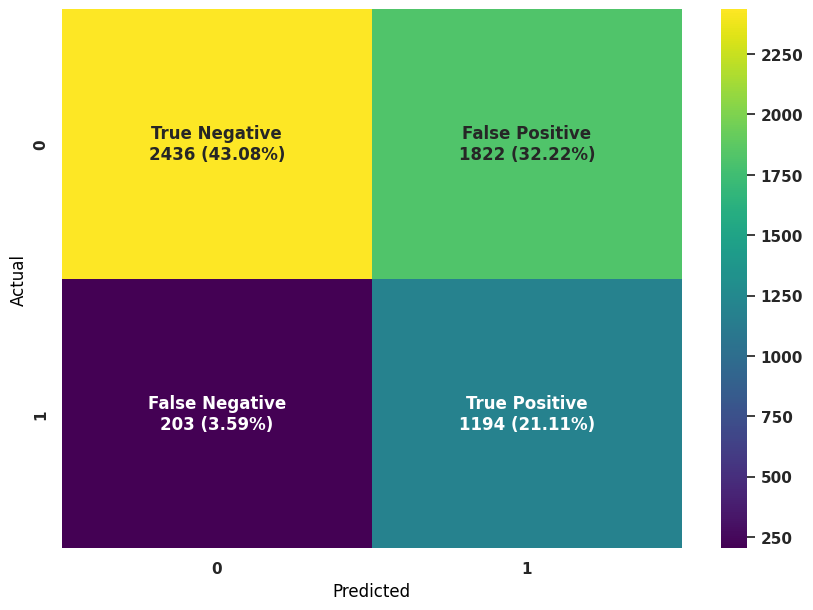

In [ ]:
# Assuming X_test is your test dataset and model is your Gradient Boosting model
y_pred = gb_tuned.predict(x_test)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)

# Calculate the percentage of each category
percentage_matrix = cnf_matrix / cnf_matrix.sum()

# Define the labels
labels = np.array([['True Negative', 'False Positive'],
                   ['False Negative', 'True Positive']])

# Create labels with both count and percentage
new_labels = (np.asarray(["{0}\n{1} ({2:.2%})".format(label, value, percentage)
                          for label, value, percentage in zip(labels.flatten(), cnf_matrix.flatten(), percentage_matrix.flatten())])
             ).reshape(2,2)

# Plot confusion matrix using a heatmap
fig = plt.figure(figsize=(10,7))
fig.patch.set_facecolor('white')  # Change figure color

sns.heatmap(cnf_matrix, annot=new_labels, fmt='', cmap='viridis', annot_kws={"weight": "bold"})  # Change heatmap color to 'viridis'
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Change label colors
plt.gca().xaxis.label.set_color('black')
plt.gca().yaxis.label.set_color('black')

plt.show()

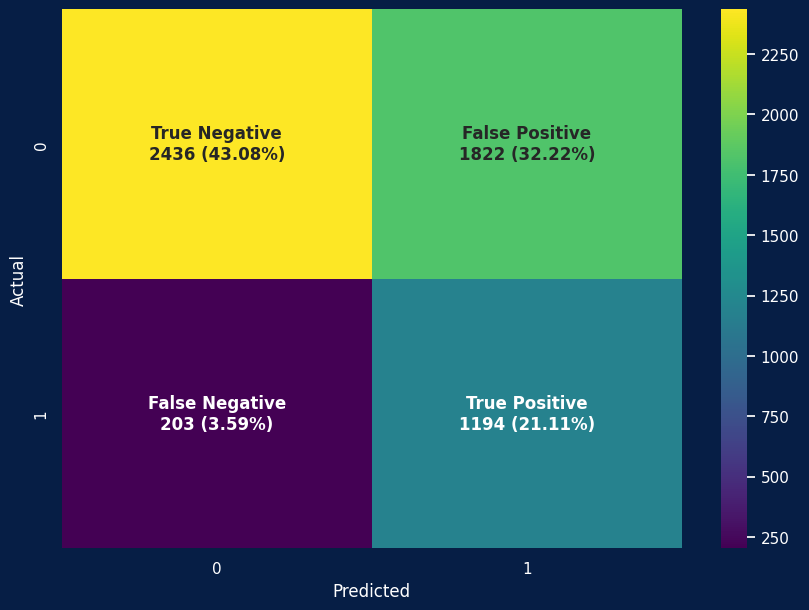

In [ ]:
# Assuming X_test is your test dataset and model is your Gradient Boosting model
y_pred = gb_tuned.predict(x_test)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)

# Calculate the percentage of each category
percentage_matrix = cnf_matrix / cnf_matrix.sum()

# Define the labels
labels = np.array([['True Negative', 'False Positive'],
                   ['False Negative', 'True Positive']])

# Create labels with both count and percentage
new_labels = (np.asarray(["{0}\n{1} ({2:.2%})".format(label, value, percentage)
                          for label, value, percentage in zip(labels.flatten(), cnf_matrix.flatten(), percentage_matrix.flatten())])
             ).reshape(2,2)

# Plot confusion matrix using a heatmap
fig = plt.figure(figsize=(10,7))
fig.patch.set_facecolor('#061E45')  # Change figure color

sns.heatmap(cnf_matrix, annot=new_labels, fmt='', cmap='viridis', annot_kws={"weight": "bold"})  # Change heatmap color to 'viridis'
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Change label colors
plt.gca().xaxis.label.set_color('white')
plt.gca().yaxis.label.set_color('white')

plt.show()

### Feature Importance

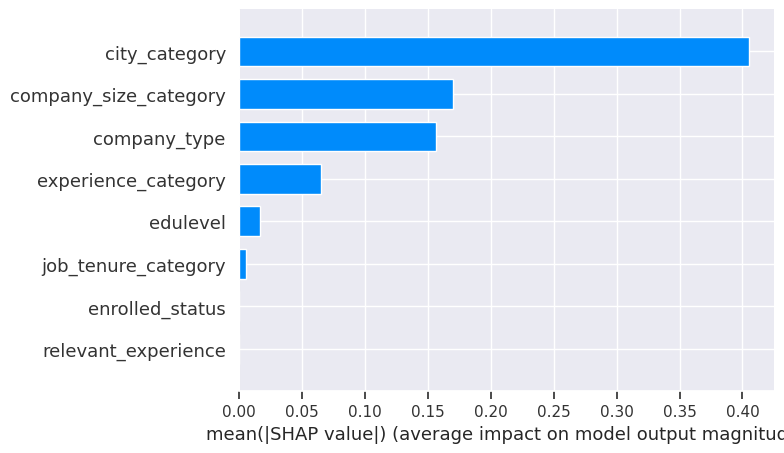

In [ ]:
# Buat objek explainer menggunakan TreeExplainer
explainer = shap.TreeExplainer(gb_tuned)

# Hitung SHAP values untuk data train dan test
shap_values_train = explainer.shap_values(x_train)
shap_values_test = explainer.shap_values(x_test)

# Tampilkan summary plot untuk data train
shap.summary_plot(shap_values_train, x_train, plot_type="bar")

# Tampilkan force plot untuk satu sampel pada data test
shap.force_plot(explainer.expected_value, shap_values_test[0], x_test.iloc[0, :])

In [ ]:
# Mengeluarkan feature importance
feature_importance = gb_tuned.feature_importances_

# Menyusun hasil feature importance ke dalam DataFrame (opsional)
feature_importance_df = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': feature_importance
})

# Menampilkan feature importance secara terurut menurun
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

                 Feature  Importance
3          city_category    0.543224
6  company_size_category    0.202800
2           company_type    0.200697
5    experience_category    0.031682
7               edulevel    0.019003
4    job_tenure_category    0.002594
0    relevant_experience    0.000000
1        enrolled_status    0.000000


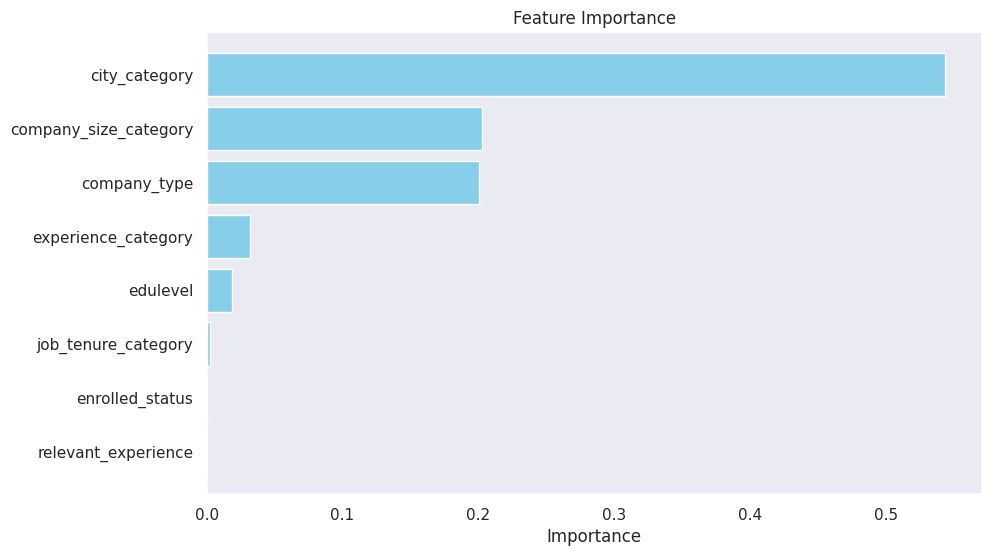

In [ ]:
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)
# Membuat bar plot
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance')

plt.grid(False)
plt.show()

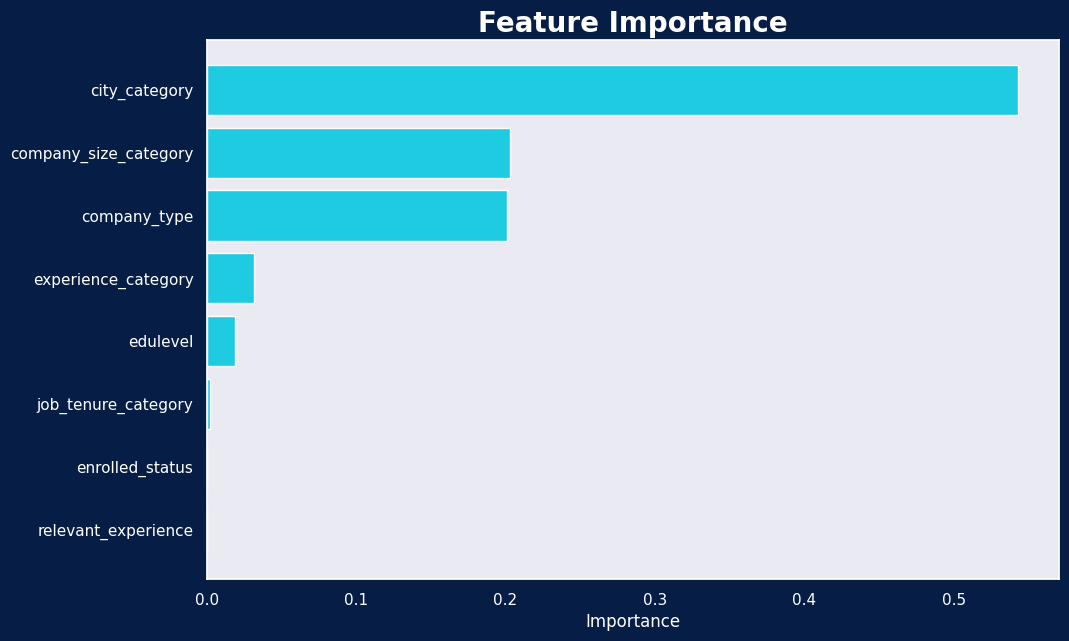

In [ ]:
# Melakukan pengurutan feature importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)

# Membuat bar plot
fig = plt.figure(figsize=(11, 7))
fig.patch.set_facecolor('#061E45')
bars = plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='#1ECBE1')
plt.xlabel('Importance', color='white')
plt.title('Feature Importance', color='white', fontsize=20, fontweight='bold')

# Adjust xtick and ytick to white
plt.xticks(color='white')
plt.yticks(color='white')

# Menghilangkan grid
plt.grid(False)

plt.show()


#### Analysis

***Feature importance*** is used to determine the features that influence a candidate to stay/leave after the training process through a model. With feature importance, stakeholders can find out what features can influence the prediction results issued by a model. Based on the processing results, the features that most influence the output / prediction results produced by Gradientboosting machine learning are:

- city_category
- company size category
- company type
- experience category
- education level


### Business Recommendation


We advise company / organization to prioritize candidate in the process of recruitment such as :
- candidate live in highly developed cities renowned for their exceptional talent
- candidates who possess four years or more of formal work experience in data science or candidate who ever employed by private companies
- no longer enrolled in further studies
- candidate that hold master degree or Phd
- candidate from business degree

However candidate from STEM background & Hold Graduate are the most register for training in the company / organization and the most related to data science. Therefore, the company still considers the candidate to be able to take part in training, where the company will implement a strategy/program so that the candidate does not leave the company after training, such as :

- mentorship program, where candidates will receive guidance from seniors who are experienced in the field of data science
- Post training support, Providing ongoing support after training. such as career counseling to ensure candidates remain connected and supported after joining the company
- Feedback loop, Creating a structured feedback system to listen to the experiences and challenges faced by candidates after they join the company

In addition, we recommend that candidate sign an employment contract when candidates are accepted to take part in the training process to confirm the candidate's commitment and secure the company's investment in training.
If after being personalized/facilitated, candidates who take part in the training still decide to leave, they will be charged penalty from the previously signed contract agreement.